# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [286]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [287]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
%matplotlib inline

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [288]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [290]:
data.shape

(340, 15)

* The dataset has 340 rows and 15 columns

### Displaying few rows of the dataset

In [291]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

### Creating a copy of original data

In [292]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [293]:
# dropping the Ticker Symbol and Security columns as they contain only unique values and do not provide any valuable information for grouping
df.drop("Ticker Symbol", axis=1, inplace=True)
df.drop("Security", axis=1, inplace=True)

### Checking the data types of the columns for the dataset

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GICS Sector                   340 non-null    object 
 1   GICS Sub Industry             340 non-null    object 
 2   Current Price                 340 non-null    float64
 3   Price Change                  340 non-null    float64
 4   Volatility                    340 non-null    float64
 5   ROE                           340 non-null    int64  
 6   Cash Ratio                    340 non-null    int64  
 7   Net Cash Flow                 340 non-null    int64  
 8   Net Income                    340 non-null    int64  
 9   Earnings Per Share            340 non-null    float64
 10  Estimated Shares Outstanding  340 non-null    float64
 11  P/E Ratio                     340 non-null    float64
 12  P/B Ratio                     340 non-null    float64
dtypes: fl

Observations
* There are 2 columns with object datatype
* The remainder are numerical in nature


### Statistical summary of the dataset

In [295]:
# statistical summary of the data
df.describe(include="all").T

count unique  \
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216.1  309675137.8   
P/E Ratio                          2.935451    15.044653    20.819876   
P/B Ratio                        -76.119077    -4.352056     -1.06717   

                                        75%            max  
GICS Sector                             NaN            NaN  
GICS Sub Industry                       NaN            NaN  
Current Price                     92.880001    1274.949951  
Price Change                      10.695493      55.051683  
Volatility                         1.695549       4.5

* Overall, there are 11 total Sectors while there are 104 Sub Industries

* The most frequent value for GISC Sector is "Industrials" with a count of 53, while the most frequent value for GISC Sub Industry is "Oil & Gas Exploration & Production" with a count of 16

In [296]:
# looking at just numerical data types
df.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

* The mean Current Price is 80.86 while the median is 59.7. The maximum price is seen at 1274.95
* The mean Price Change is 4.01 which is not far from the median Price Change at 4.82. The maximum Price change is 55.05 while the minimum is a negative value (-47.13)
* The mean Net Income is 1.49e+09 or 1 billion four hundred ninety million, while the median is 7.07e+08 or 707 million.
* The mean Earnings Per Share is 2.78 while the median is 2.89.
* The mean P/E Ratio is 32.61, the the median is 20.82
* The mean P/B Ratio is -1.72 while the median is -1.07. It appears many of the values in this column are negative values when it comes to the P/B Ratio

### Checking for missing values

In [297]:
# checking for missing values
df.isna().sum()

GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values in our data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [298]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

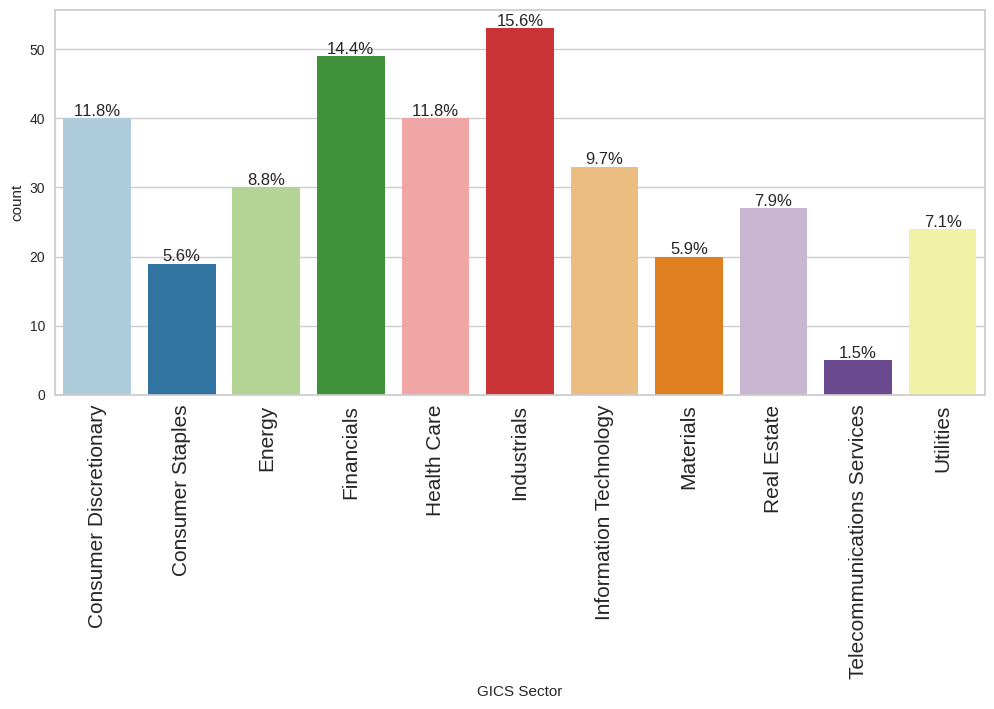

In [299]:
labeled_barplot(df, "GICS Sector", perc=True)

* Industrials Sector has the highest count at 15.6% followed by Financials at 14.4%
* Both Consumer Discretionary and Health Care sectors are at 11.8%
* Telecommunications Services Sector has the least at 1.5%

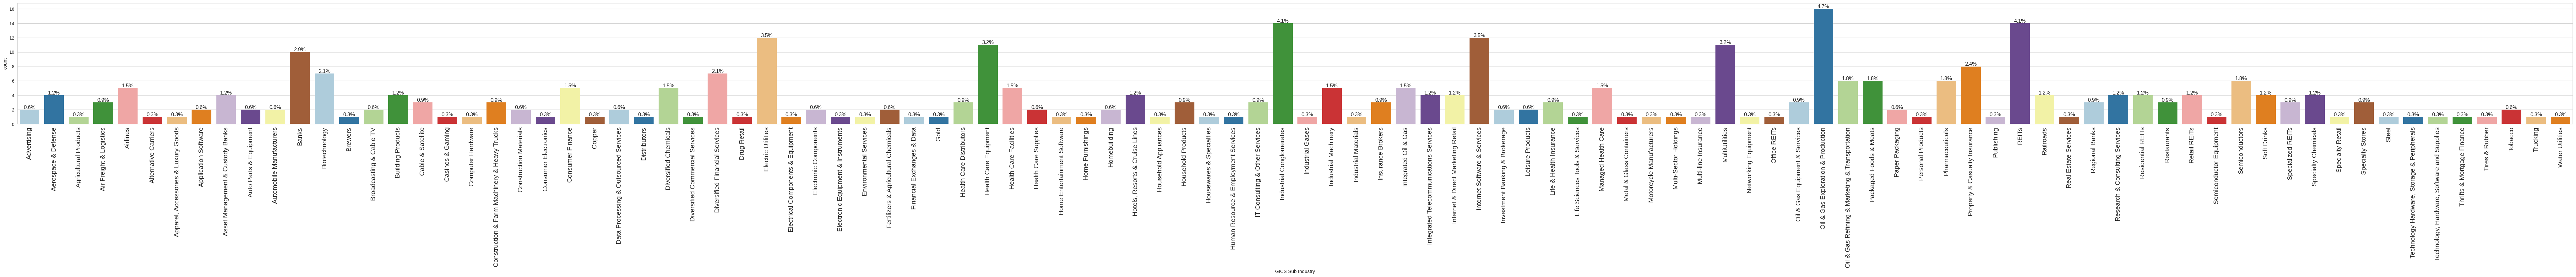

In [300]:
labeled_barplot(df, "GICS Sub Industry", perc=True)

* GICS Sub Industry is difficult to interpret through visualization, as there are many different values/subsectors in this category
* Let's explore this further below

In [301]:
no_unique_values_subsector = df['GICS Sub Industry'].nunique()
print(no_unique_values_subsector)

104


* There are 104 different GICS Sub Industries
* Looking at the value counts for each below, we can see:
  - "Oil & Gas Exploration & Production" makes up the highest count at 16, while "REITs" and "Industrial Conglomerates" follow at 14 each
  - "Electric Utilities" and "Internet Software & Services" each have count at 12
  - "Health Care Equipment" and "MultiUtilities" each have a count of 11, followed by "Banks" at 10
  - The remainder of values have a single digit count

In [302]:
# Find the count for each GICS Sub Industry
df["GICS Sub Industry"].value_counts()

GICS Sub Industry
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Biotechnology                                       7
Diversified Financial Services                      7
Semiconductors                                      6
Oil & Gas Refining & Marketing & Transportation     6
Packaged Foods & Meats                              6
Pharmaceuticals                                     6
Airlines                                            5
Diversified Chemicals                               5
Health Care Facilities                              5
Integrated Oil & Gas                                5
Industrial Machinery                                5
Managed Health Care                                 5
Consumer Finance                                    5
Aerospace & Defense                                 4
Hotels, Resorts & Cruise Lines                      4
Asset Management & Custody Banks                    4
Specialty Chemicals                                 4
Building Products                                   4
Railroads                                           4
Integrated Telecommunications Services              4
Research & Consulting Services                      4
Soft Drinks                                         4
Retail REITs                                        4
Internet & Direct Marketing Retail                  4
Residential REITs                                   4
Health Care Distributors                            3
Life & Health Insurance                             3
Insurance Brokers                                   3
Construction & Farm Machinery & Heavy Trucks        3
Specialized REITs                                   3
Oil & Gas Equipment & Services                      3
Household Products                                  3
IT Consulting & Other Services                      3
Regional Banks                                      3
Restaurants                                         3
Specialty Stores                                    3
Air Freight & Logistics                             3
Cable & Satellite                                   3
Investment Banking & Brokerage                      2
Electronic Components                               2
Application Software                                2
Data Processing & Outsourced Services               2
Auto Parts & Equipment                              2
Leisure Products                                    2
Automobile Manufacturers                            2
Fertilizers & Agricultural Chemicals                2
Health Care Supplies                                2
Paper Packaging                                     2
Construction Materials                              2
Tobacco                                             2
Homebuilding                                        2
Advertising                                         2
Broadcasting & Cable TV                             2
Semiconductor Equipment                             1
Agricultural Products                               1
Real Estate Services                                1
Metal & Glass Containers                            1
Home Entertainment Software                         1
Water Utilities                                     1
Electrical Components & Equipment                   1
Multi-line Insurance                                1
Drug Retail                                         1
Financial Exchanges & Data                          1
Technology Hardware, Storage & Peripherals          1
Motorcycle Manufacturers                

In [303]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

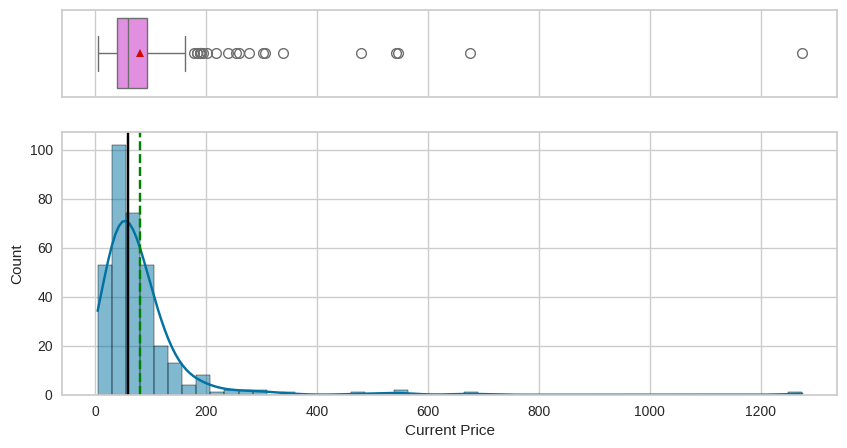

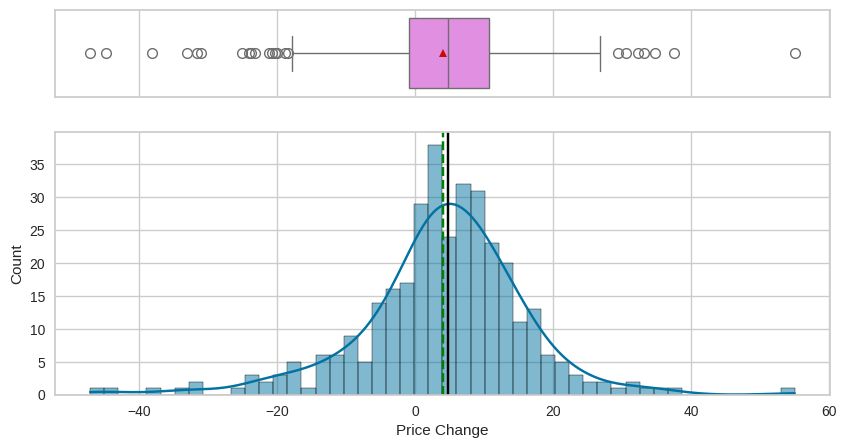

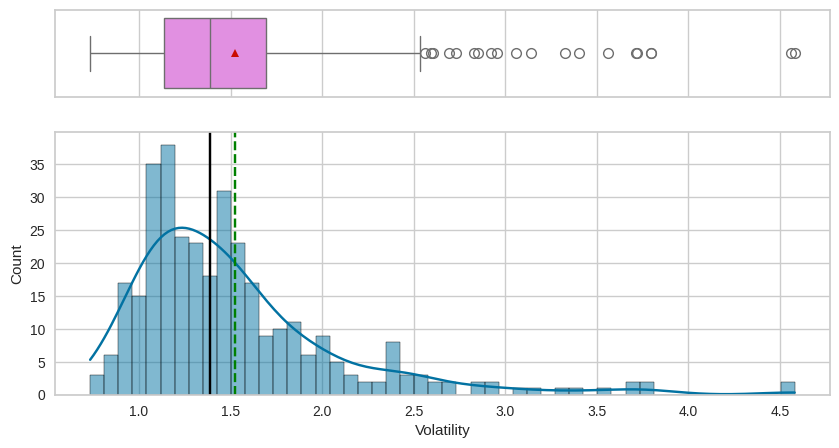

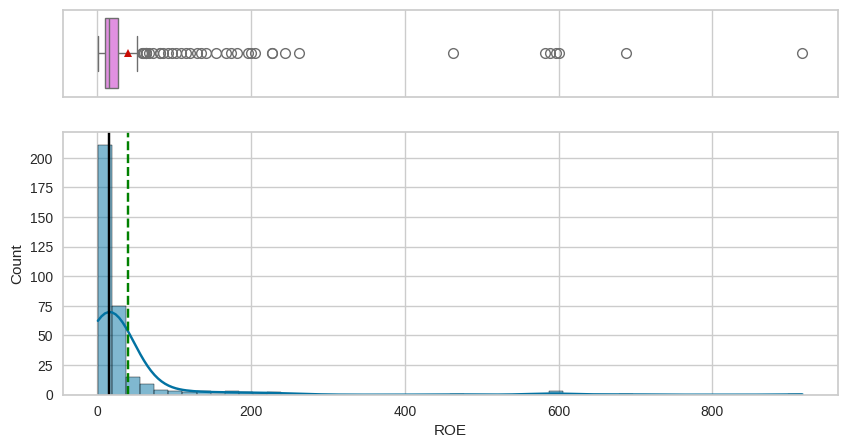

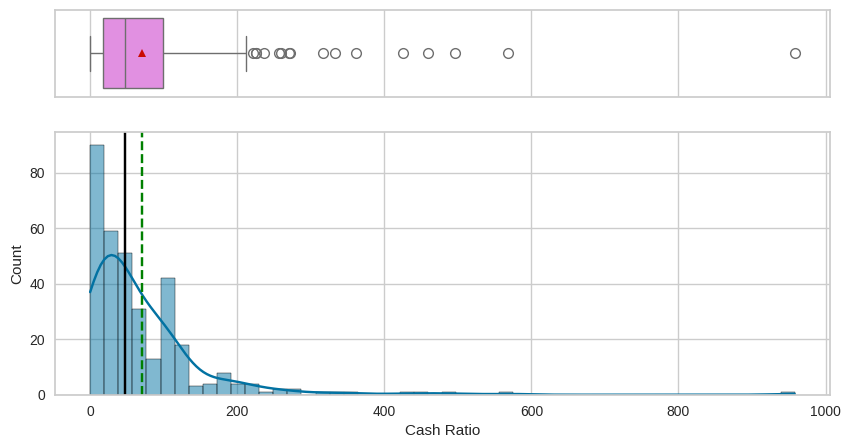

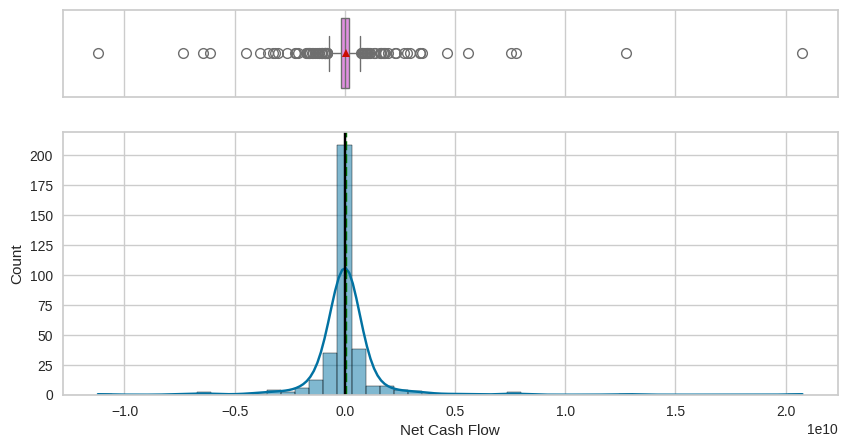

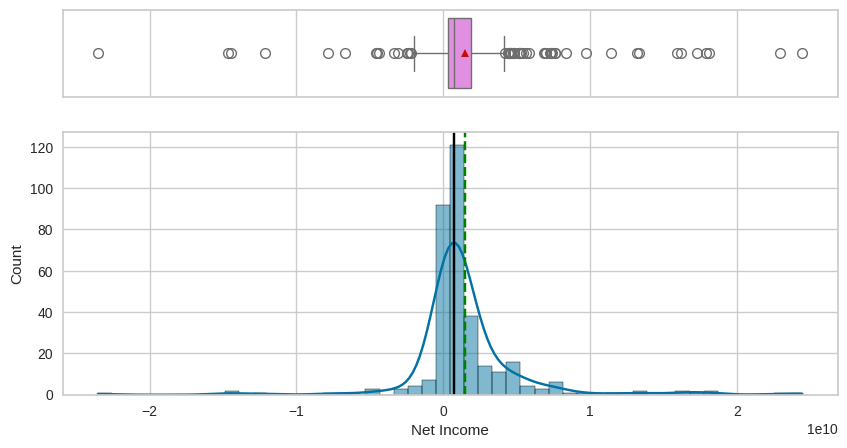

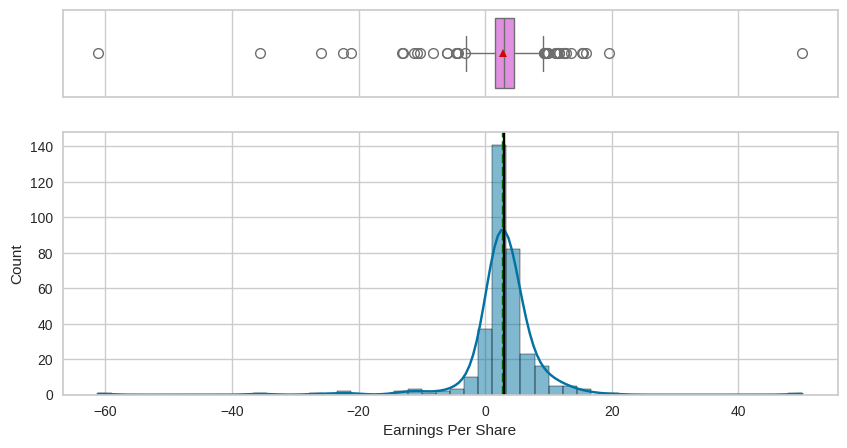

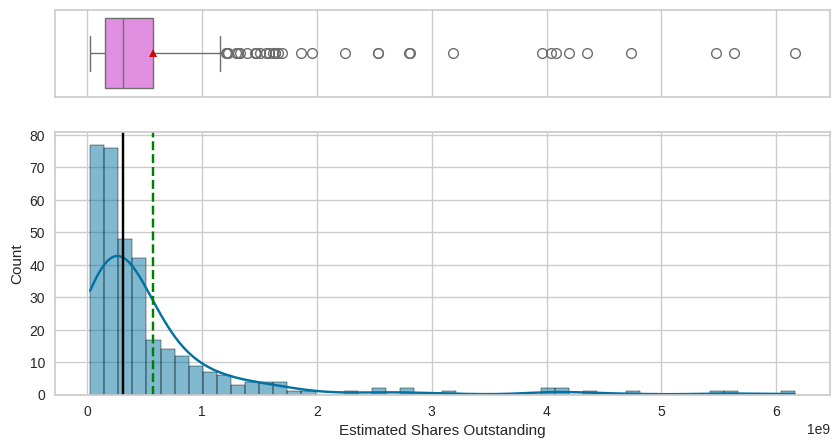

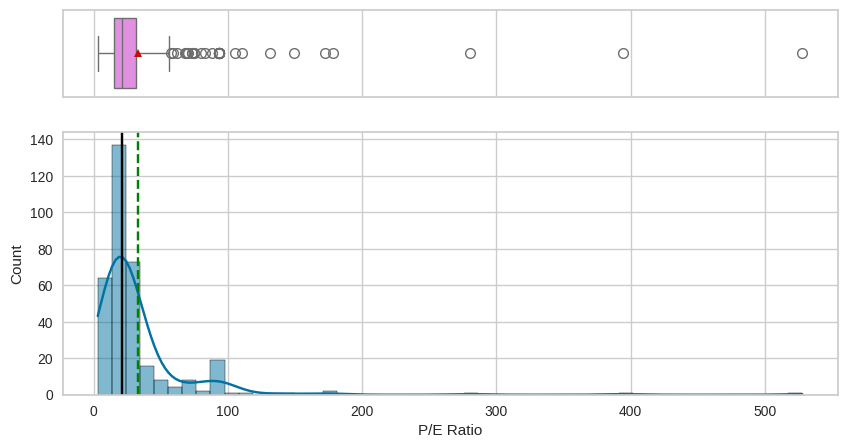

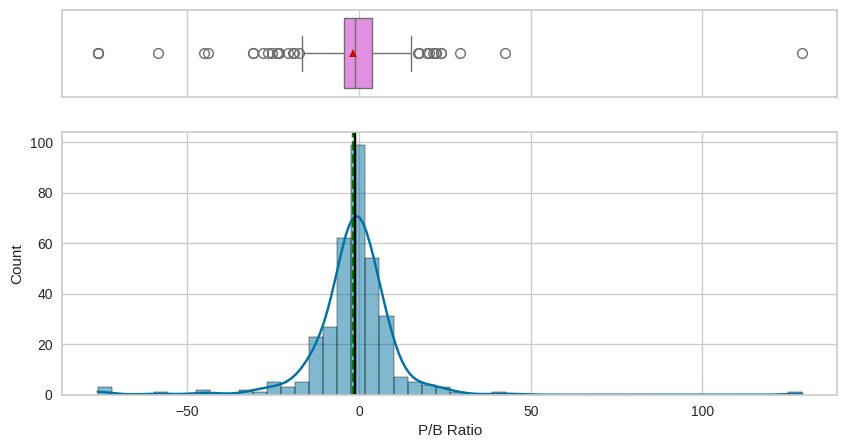

In [304]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

* The Current Price is Right skewed with majority of data points below 200
* Price Change shows a normal distribution in the visualization with mean and median close together around ~5, with many values falling into the negative range
* The Volatility is Right Skewed, with many outliers greater than ~2.5
* ROE is Right skewed, appears values greater than 50 are considered an outlier
* Cash Ratio is Right skewed with values greater than ~210 considered an outlier
* Net Cash Flow appears normally distributed around 0, however has many outliers on either end with both negative and positive value outliers
* Net Income appears somewhat normally disributed as it has outliers in both the negative and positive range
* Earnings Per Share appears normally distributed with outliers in both negative and positive range
* Estimated Shares Outstanding is Right skewed, with values greater than 1.25 considered an outlier.
* P/E Ratio is Right skewed with values greater than ~50 considered an outlier. Of note, there is an increase in count with values just below 100.
* P/B Ratio appears normally distributed with values in both negative and positive range.

### Bivariate Analysis

Let's check for correlations

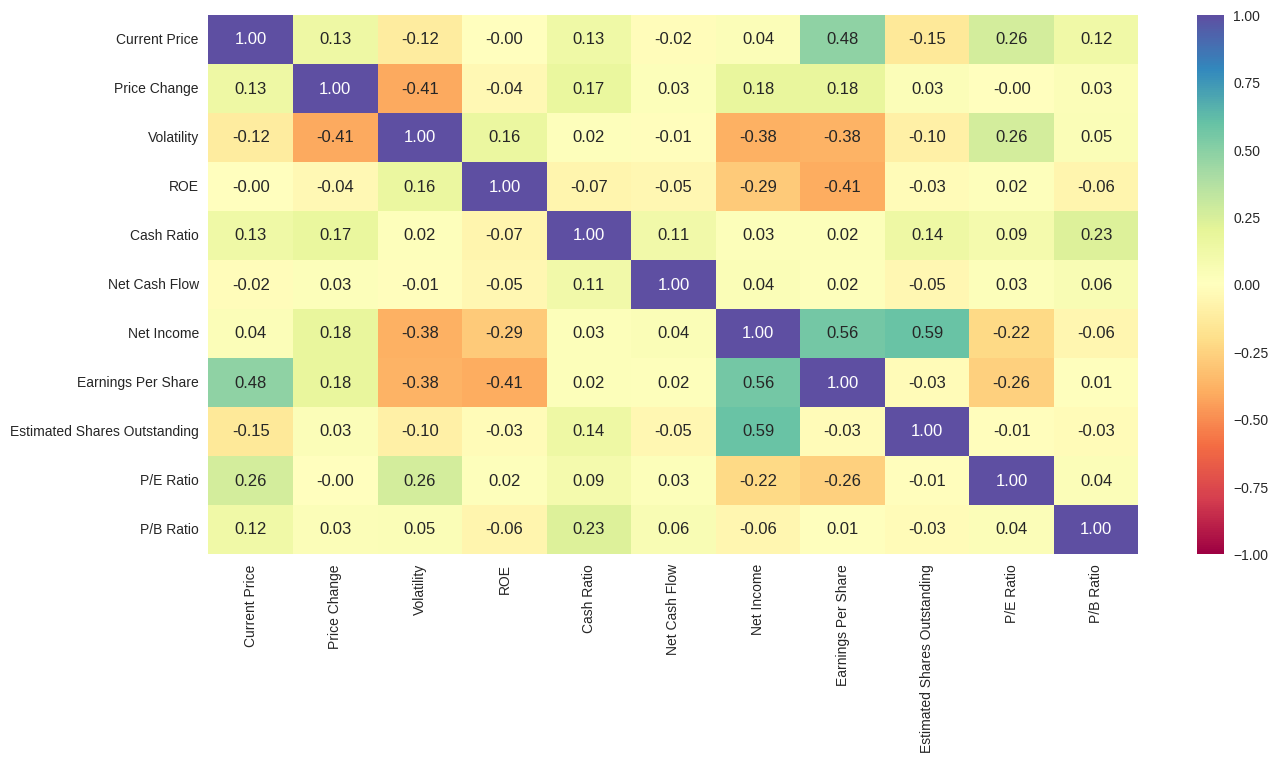

In [305]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no strong correlations noted in this data set, however weak-moderate correlations can be seen:
 - There is a moderate positive correlation between Estimated Shares Outstanding and Net Income at 0.59
 - There is a moderate positive correlation of 0.56 between Earnings Per Share and Net Income, as well as 0.48 between Earnings Per Share and Current Price
 - There is a negative correlation of -0.41 between Volatility and Price Change
 - There is a negative correlation of -0.41 between Earnings Per Share and ROE
 - There are further negative correlations shared by Volatility and Net Income and Volatility and Earnings per Share, both with -0.38

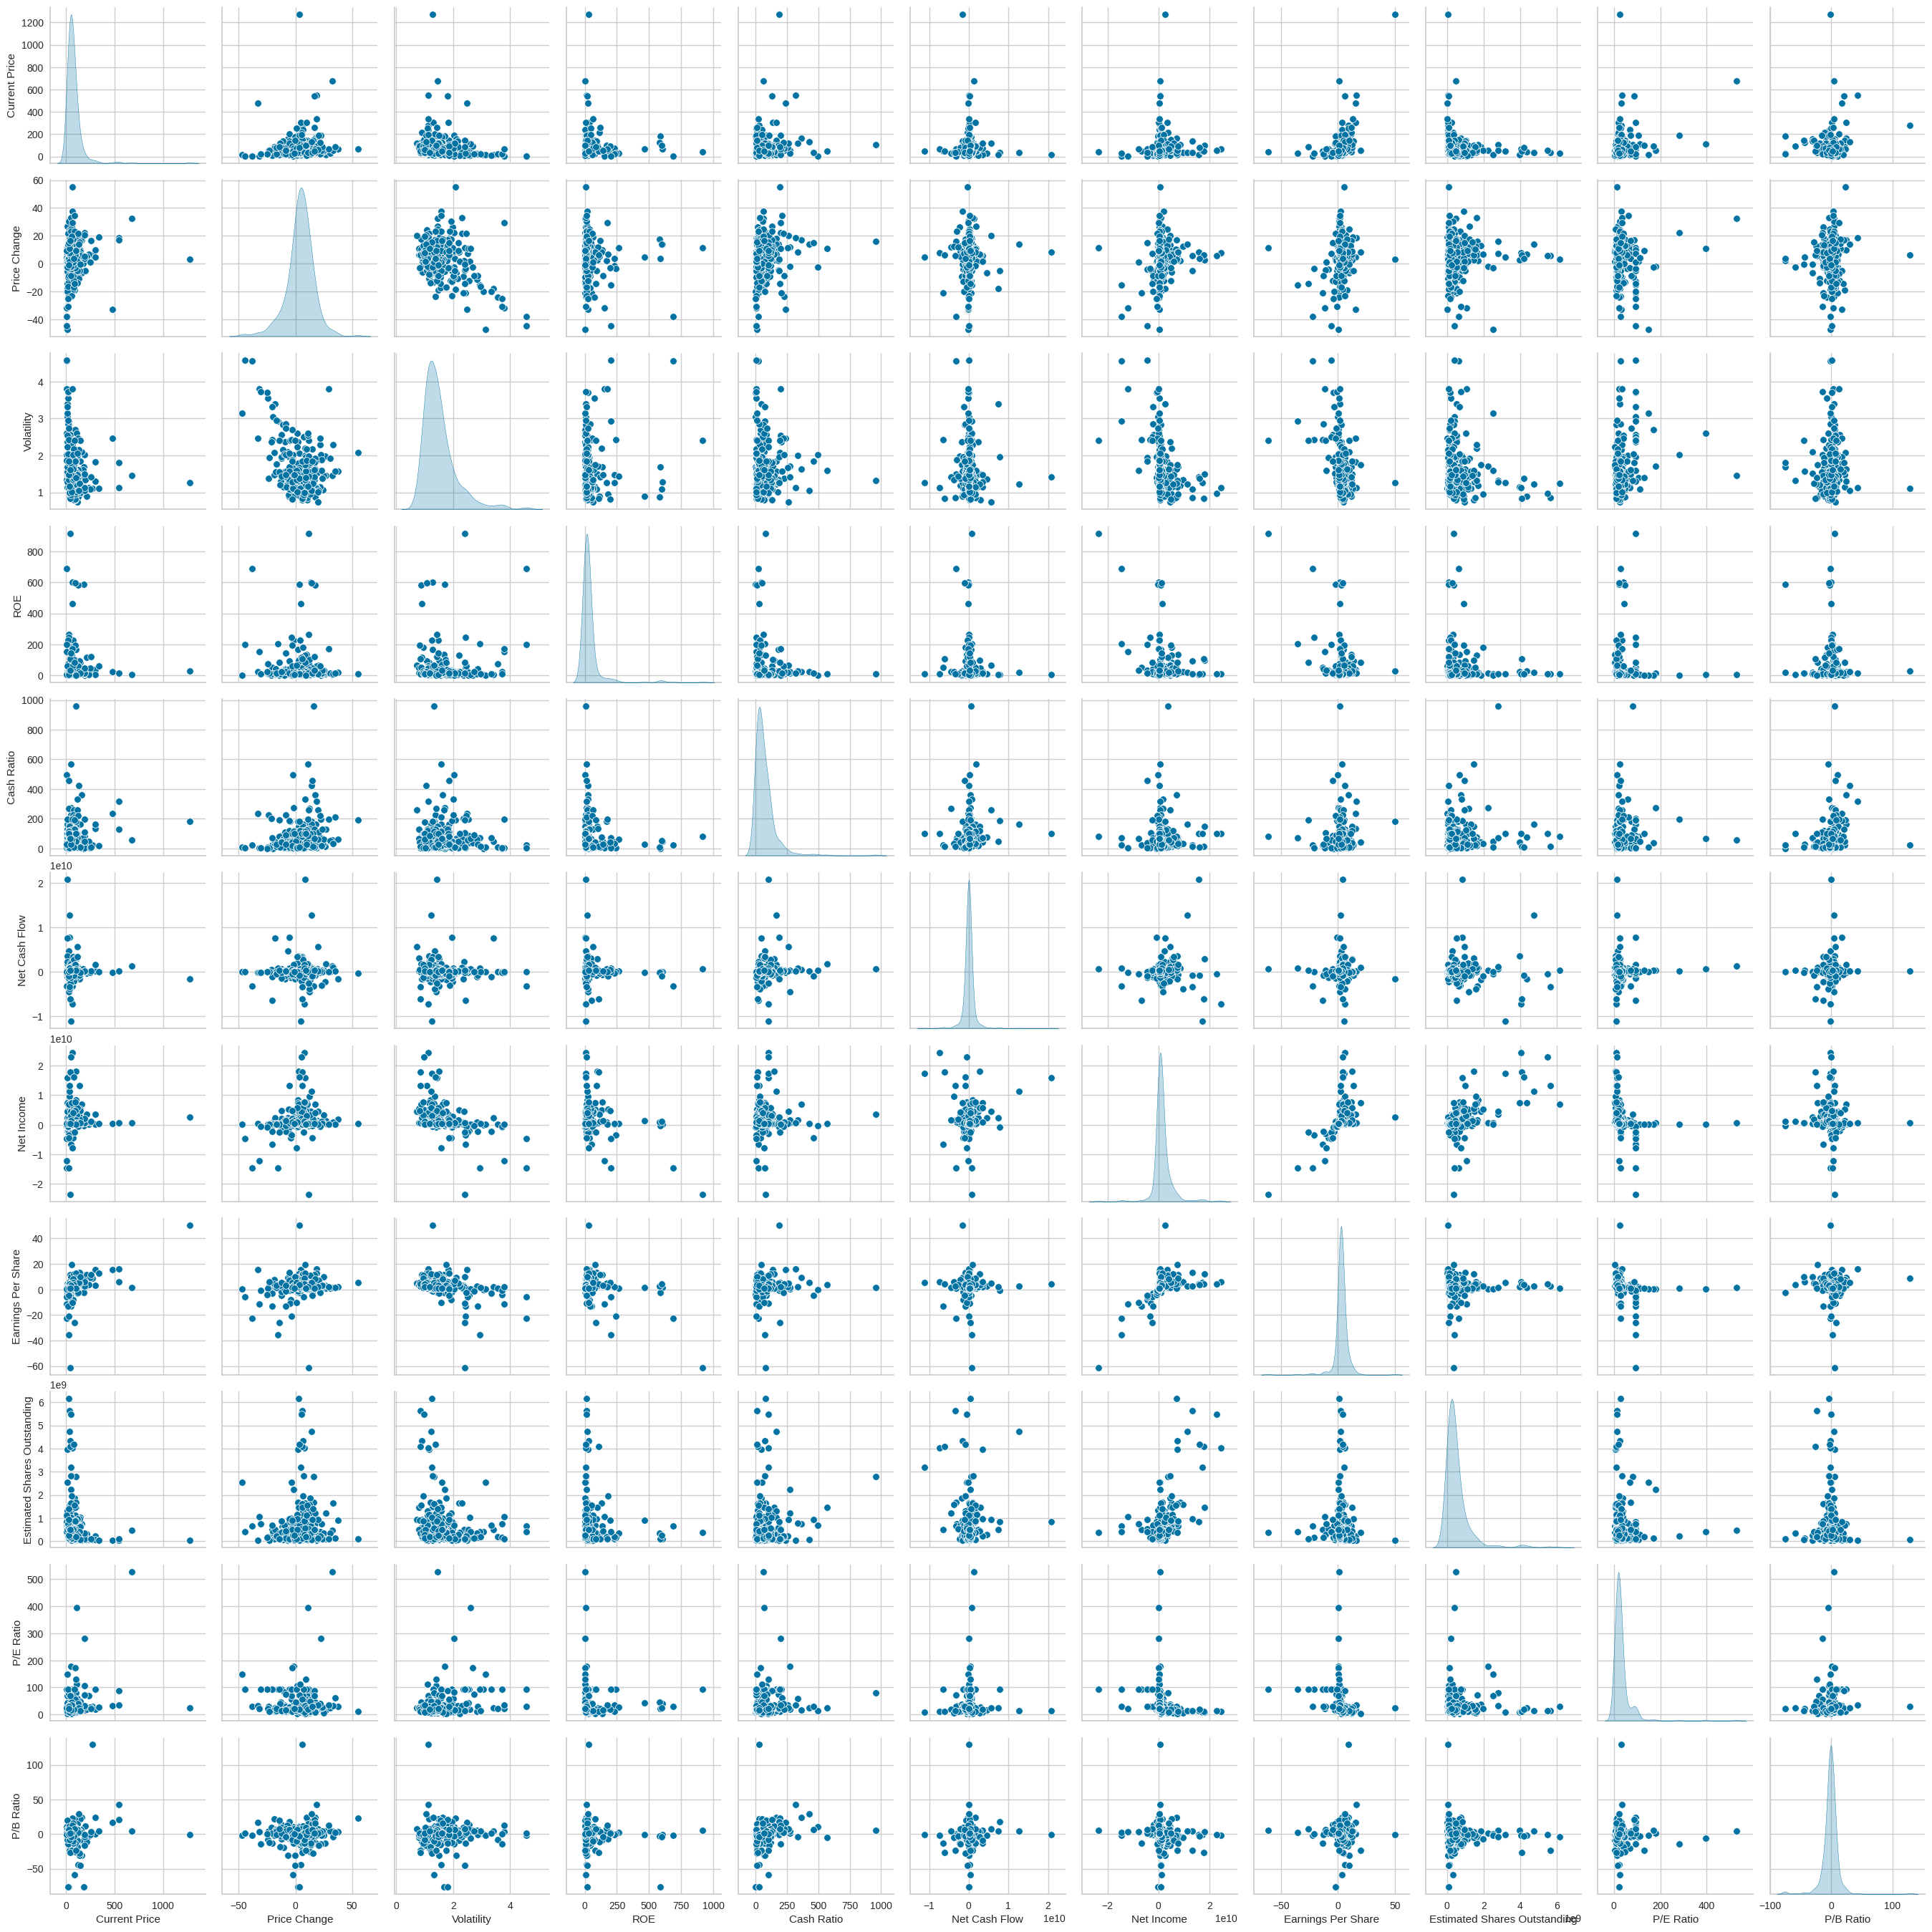

In [306]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

* P/B Ratio appears normally distributed
* P/E Ratio appears slightly bimodal
* Net Income appears normally distributed as well as Price Change, Net Cash Flow and Net Income

### Leading Questions

1. What does the distribution of stock prices look like?

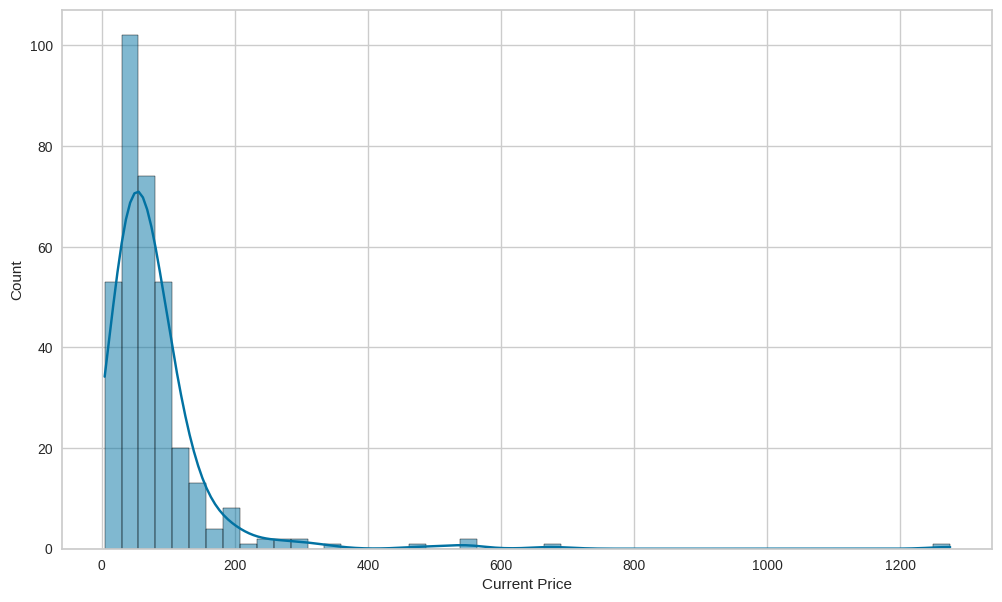

In [307]:
# Find the distribution of Current Price
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x="Current Price", bins=50, kde=True)
plt.show()

* Current Price is right skewed with majority of data points below 200, peaking below 100
* There are outliers in the positive range with the furthest data point noted to be greater than 1200 as can be seen in the boxplot below
* We know from data description earlier that the mean Current Price is 80.86 while the median is 59.7.

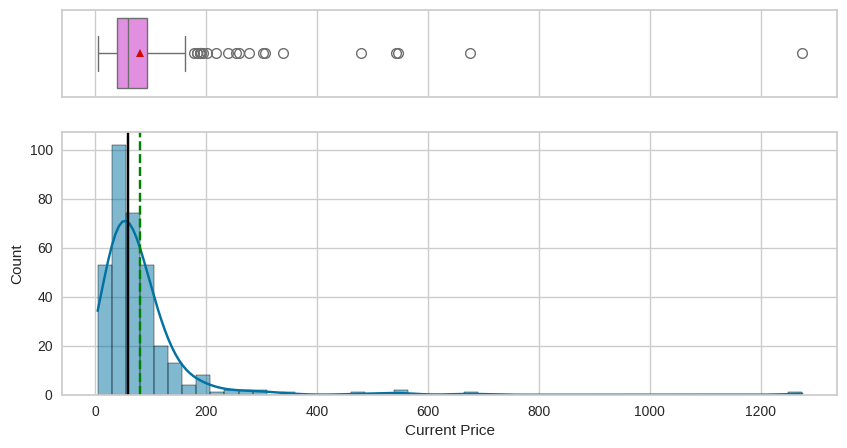

In [308]:
histogram_boxplot(df, "Current Price", bins=50, kde=True, figsize=(10, 5))

2. The stocks of which economic sector have seen the maximum price increase on average?

In [309]:
# Find which GICS Sector has maximum Price Change on average
df.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

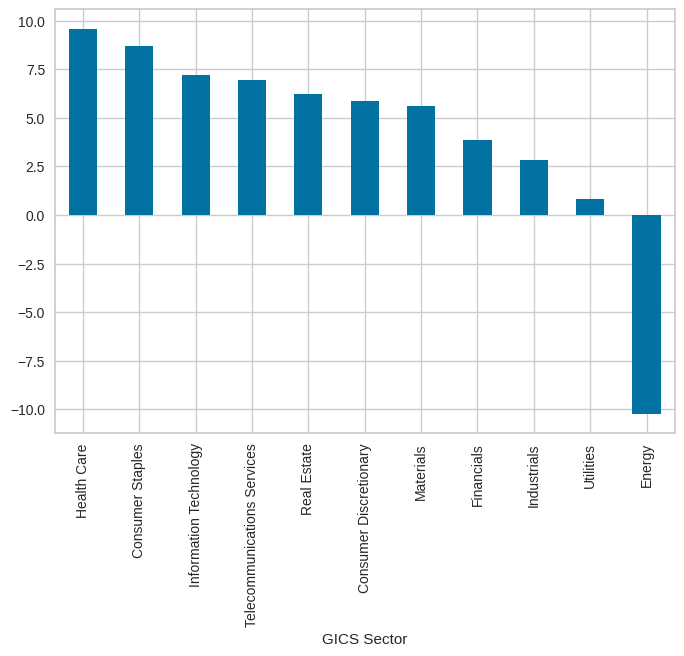

In [310]:
# Visualize which GICS Sector has maximum Price Change on average
average_price_change = df.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)
average_price_change.plot(kind='bar')
plt.show()

* On average, the Health Care Sector has seen the highest price increase at 9.59, followed by Consumer Staples at 8.68, then Information Technology at 7.22
* Of note, Energy is in the negative range
* This may indicate positive sentiment in the market for stocks in Health Care sector with great potential, although we must take other factors into consideration such as outliers that may affect the average, as well as volatility of the stock

3. How are the different variables correlated with each other?

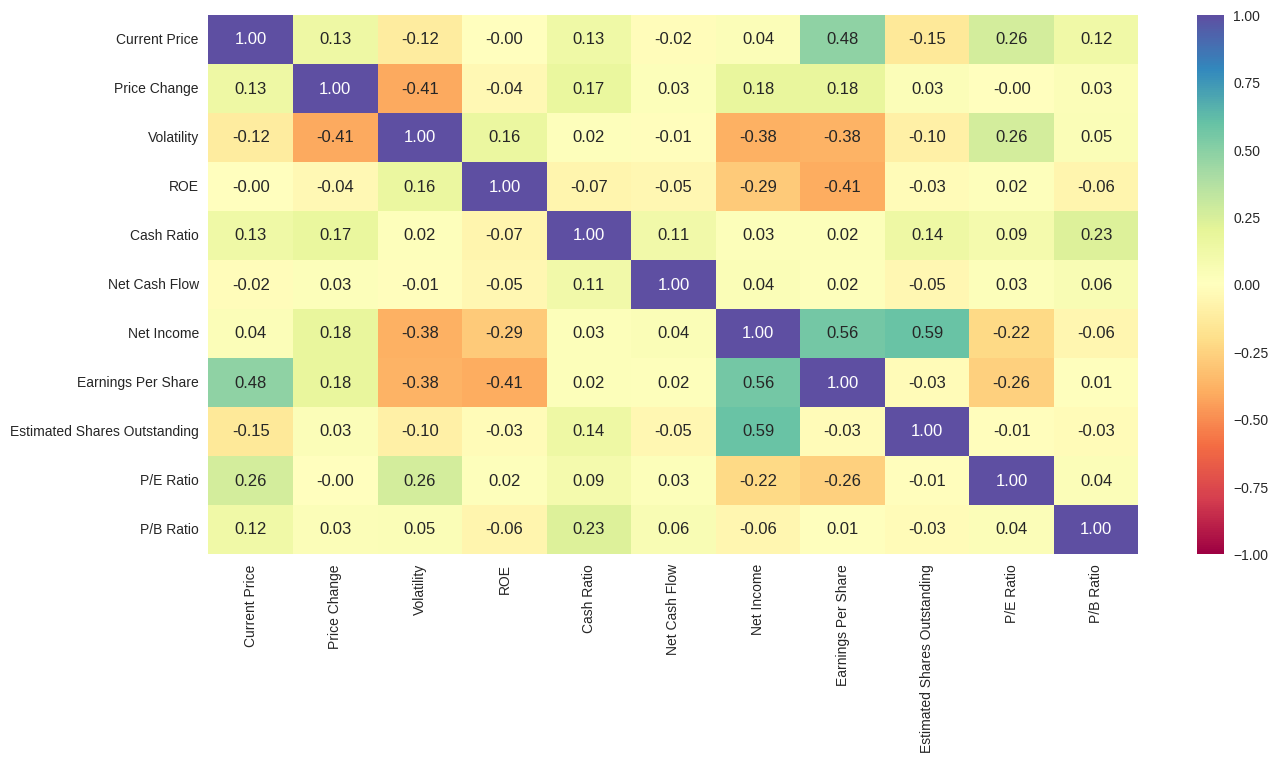

In [311]:
# Find how different variables are correlated with each other
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive correlation between Estimated Shares Outstanding and Net Income at 0.59
* There is a positive correlation of 0.56 between Earnings Per Share and Net Income, as well as 0.48 between Earnings Per Share and Current Price
* There is a negative correlation of -0.41 between Volatility and Price Change
* There is a negative correlation of -0.41 between Earnings Per Share and ROE
* There are further negative correlations shared by Volatility and Net Income and Volatility and Earnings per Share, both with -0.38

Earnings Per Share, Net Income, and Volatility are the variables that appear to most likely have correlations with other variables. We may consider asking Trade&Ahead which variables can possibly be eliminated for further analysis vs which they have interest in looking into more closely. At this time, we will keep in our data set.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [312]:
# Find how average Cash Ratio varies across GISC Sector
df.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

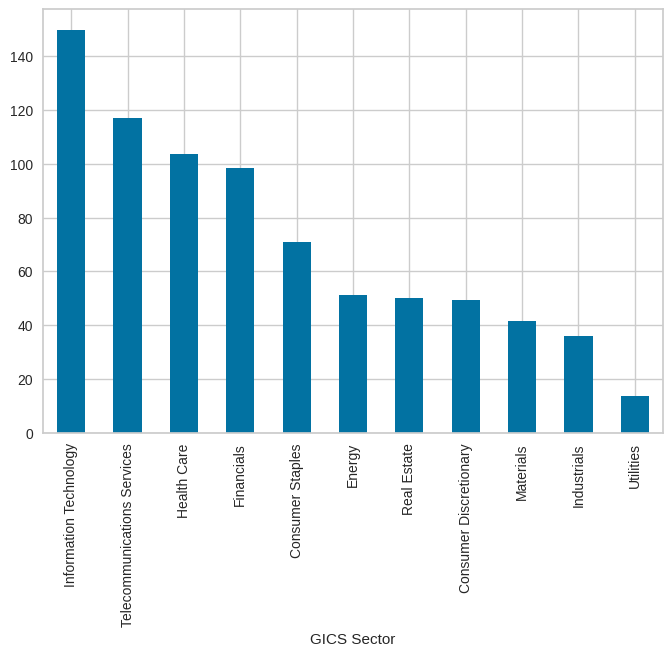

In [313]:
# Visualize how average Cash Ratio varies across GICS Sector
average_cash_ratio = df.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)
average_cash_ratio.plot(kind='bar')
plt.show()

* On average, the Cash Ratio is highest in Information Techology Sector at 149.82, followed by Telecommunication Services at 117, then Health Care at 103.78
* This can indicate financial strength and stability for stocks in IT, Telecommunication services and Health Care as well as indicate stability over growth for these sectors at this time

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [314]:
# Find how average P/E Ratio varies across GISC Sector
df.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

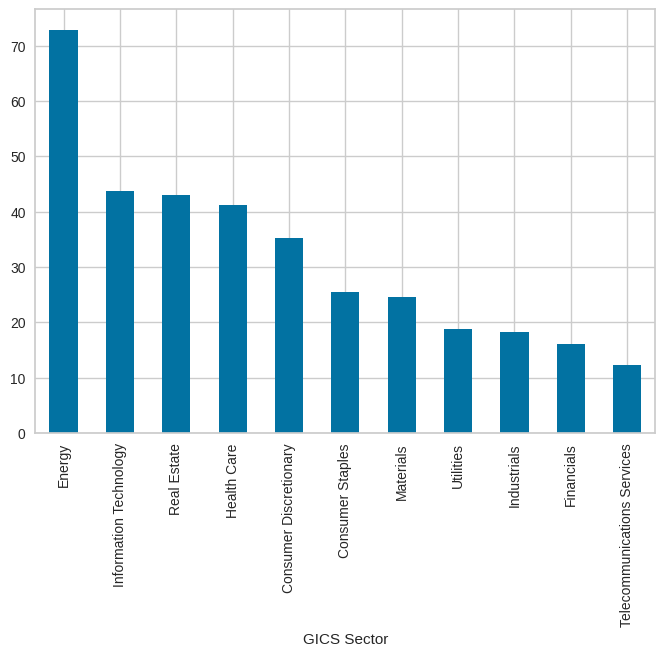

In [315]:
# Visualize how average P/E Ratio varies across GICS Sector
average_pe_ratio = df.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)
average_pe_ratio.plot(kind='bar')
plt.show()

* On average, the P/E Ratio is highest in the Energy Sector at 72.9, followed by Information Technology at 43.78, then Real Estate at 43.06.
* This can mean sector is expensive relative to its current earnings but can tell us there are high growth expectations and optimism about the stocks. On the other hand, there is concern for overvaluation.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [316]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicate values in this data set.

In [317]:
# Check for missing values
df.isna().sum()

GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values in this data set.

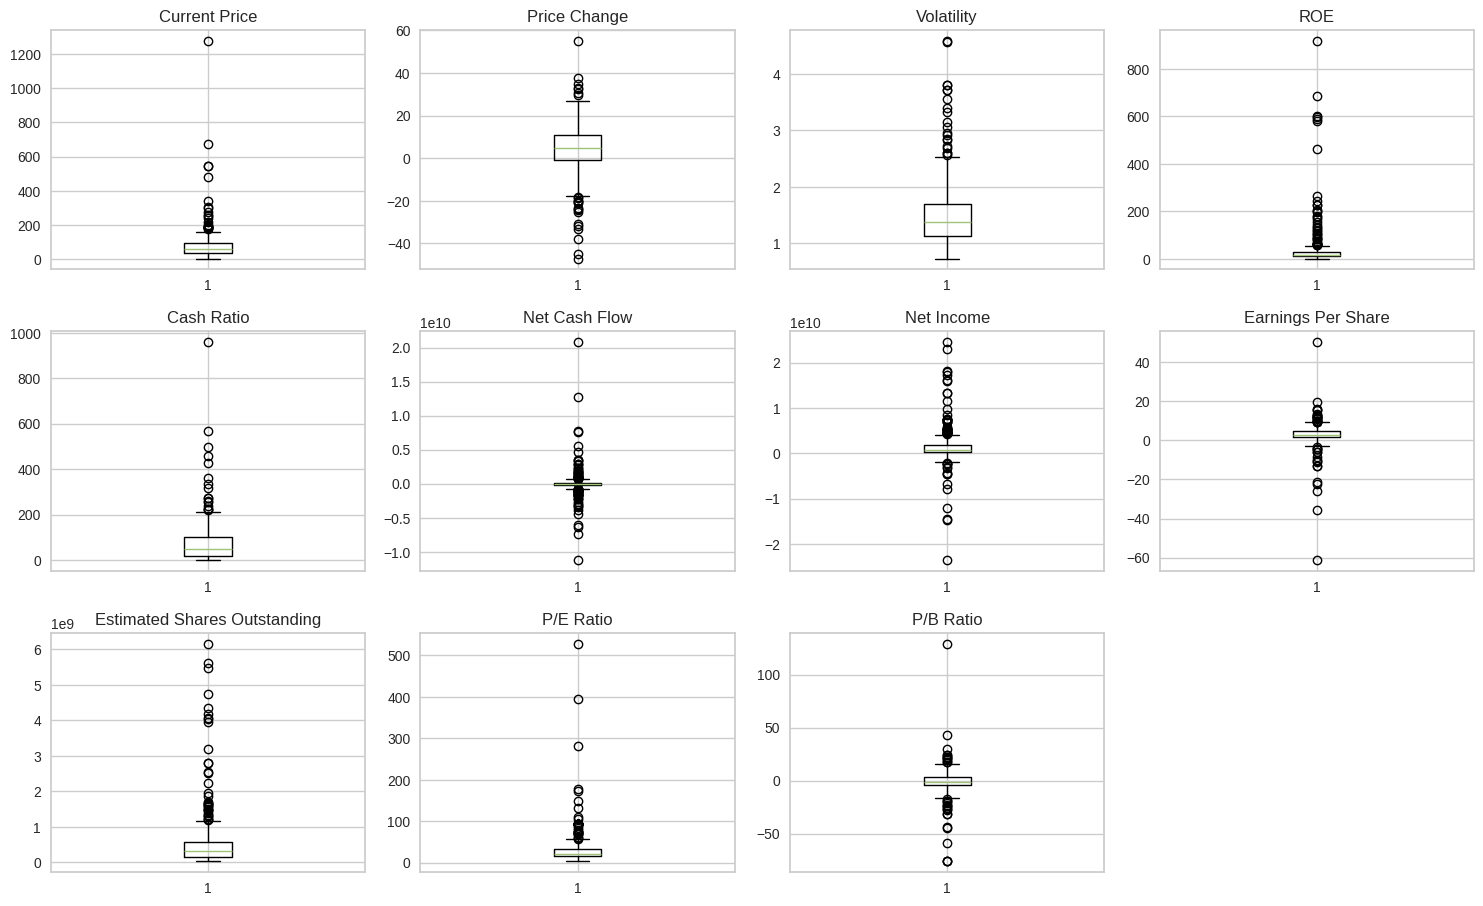

In [318]:
# Outlier Check
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* In addition, we will keep outliers as they are true values

### Data Preprocessing

In [319]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [320]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [321]:
# referencing original data as comparison
df.head()

GICS Sector      GICS Sub Industry  Current Price  Price Change  \
0             Industrials               Airlines      42.349998      9.999995   
1             Health Care        Pharmaceuticals      59.240002      8.339433   
2             Health Care  Health Care Equipment      44.910000     11.301121   
3  Information Technology   Application Software      93.940002     13.977195   
4  Information Technology         Semiconductors      55.320000     -1.827858   

   Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    1.687151  135          51     -604000000  7610000000               11.39   
1    2.197887  130          77       51000000  5144000000                3.15   
2    1.273646   21          67      938000000  4423000000                2.94   
3    1.357679    9         180     -240840000   629551000                1.26   
4    1.701169   14         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [322]:
# looking at scaled data for comparison
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

* After scaling the data, the values of the numerical columns have been updated
* Current Price now has values in the negative range when scaled and compared to the original data
* In general, all the values appear smaller in the scaled data when compared to original data

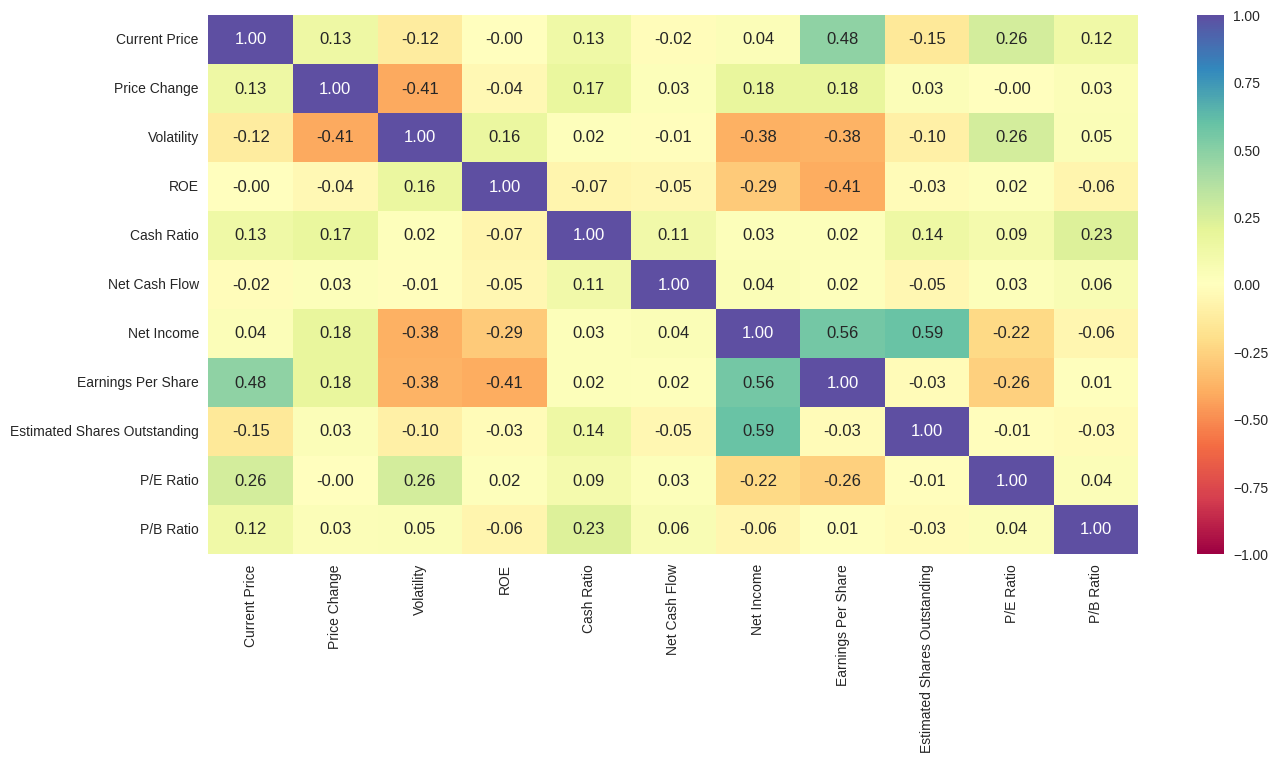

In [323]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Contrary to the differences found in the values of the data sets, Correlations remain the same after data scaled

## K-means Clustering

### Apply K-means Clustering

In [324]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.4527162848868955
Number of Clusters: 3 	Average Distortion: 2.3438399430731764
Number of Clusters: 4 	Average Distortion: 2.1826116703852625
Number of Clusters: 5 	Average Distortion: 2.1250146021274716
Number of Clusters: 6 	Average Distortion: 2.088439329050122
Number of Clusters: 7 	Average Distortion: 2.0602372101646913
Number of Clusters: 8 	Average Distortion: 1.960246706815347


### Plot the Elbow Curve

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

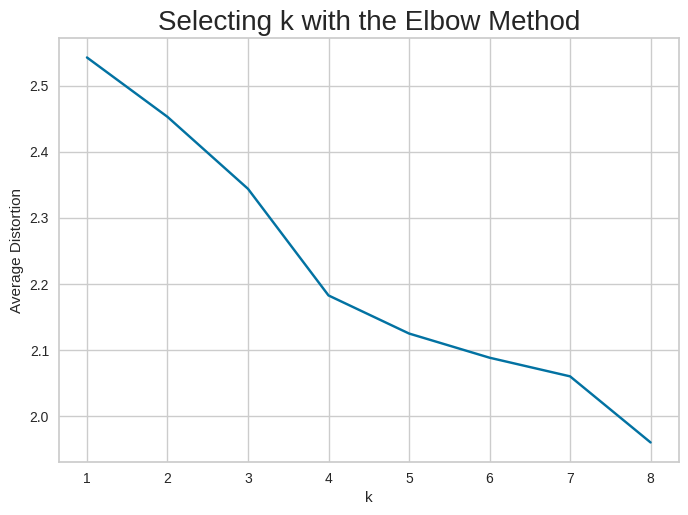

In [325]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The appropriate value of k from the elbow curve seems to be around 4, then again at around 7

### Check Silhouette Scores

For n_clusters = 2, silhouette score is 0.5226110336280948
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4202330380779863
For n_clusters = 5, silhouette score is 0.31443741871546493
For n_clusters = 6, silhouette score is 0.37742297165579813
For n_clusters = 7, silhouette score is 0.4428336436757555
For n_clusters = 8, silhouette score is 0.3706231527992924
For n_clusters = 9, silhouette score is 0.31844099775524826


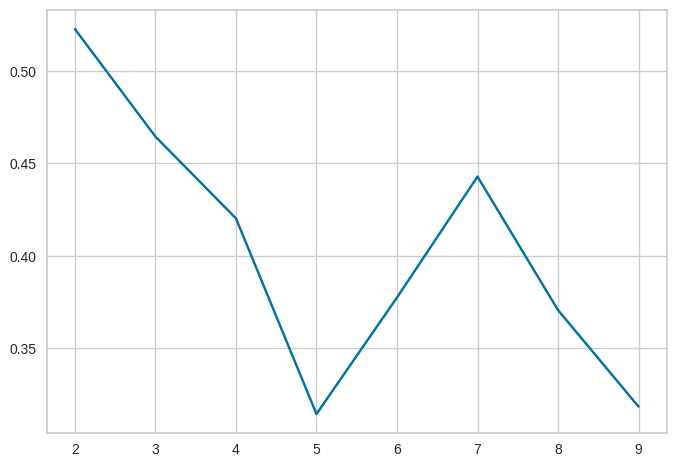

In [326]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

From the Silhouette Scores, around 3 or 4 seems to stand out again in addition to 6 or 7

### Find Appropriate Number of Clusters

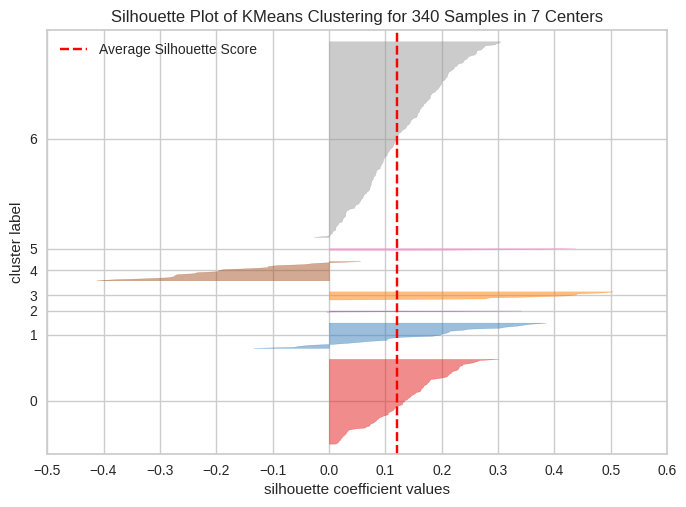

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [327]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

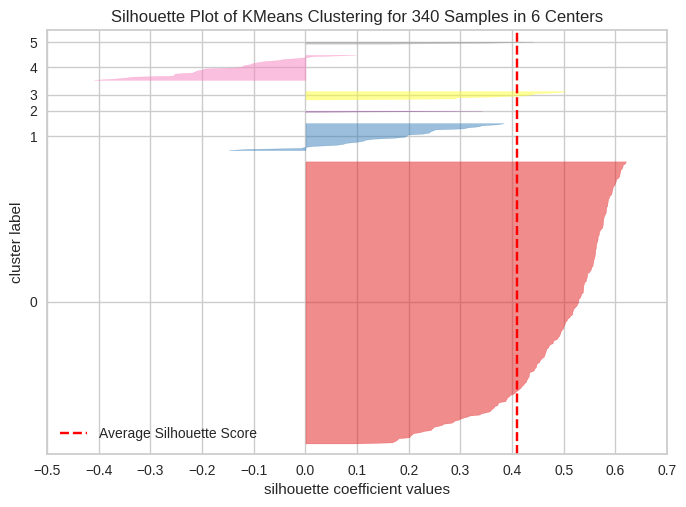

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [328]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

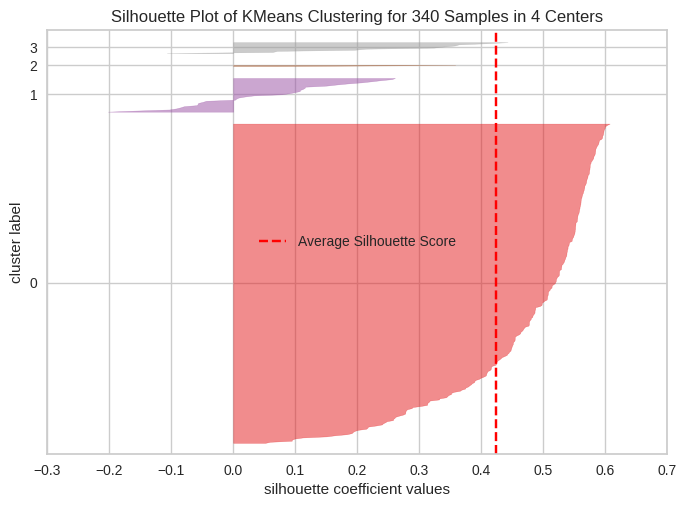

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [329]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

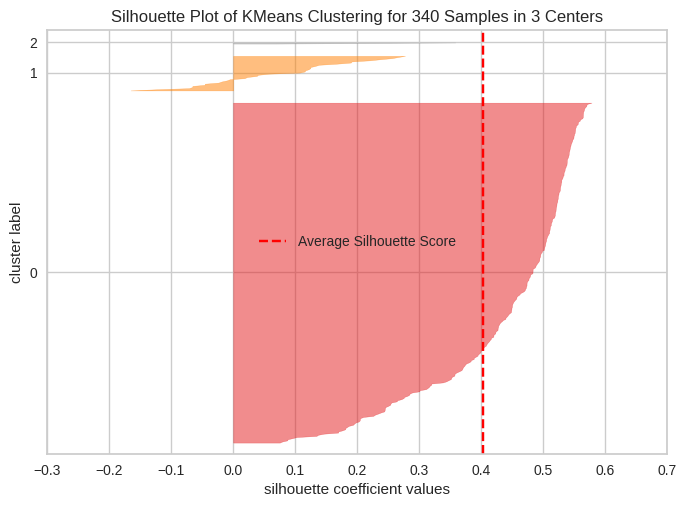

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [330]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

All trials show negative values, indicating data points that do not fit into any of the clusters. Despite having negative values, 4 has the highest silhouette coefficient and may provide better clustering than 3

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.**

In [331]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [332]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [333]:
df.head()

GICS Sector      GICS Sub Industry  Current Price  Price Change  \
0             Industrials               Airlines      42.349998      9.999995   
1             Health Care        Pharmaceuticals      59.240002      8.339433   
2             Health Care  Health Care Equipment      44.910000     11.301121   
3  Information Technology   Application Software      93.940002     13.977195   
4  Information Technology         Semiconductors      55.320000     -1.827858   

   Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    1.687151  135          51     -604000000  7610000000               11.39   
1    2.197887  130          77       51000000  5144000000                3.15   
2    1.273646   21          67      938000000  4423000000                2.94   
3    1.357679    9         180     -240840000   629551000                1.26   
4    1.701169   14         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  K_means_segments  
0                  6.681299e+08    3.718174  -8.784219                 0  
1                  1.633016e+09   18.806350  -8.750068                 0  
2                  1.504422e+09   15.275510  -0.394171                 0  
3                  4.996437e+08   74.555557   4.199651                 0  
4                  2.247994e+09  178.451613   1.059810                 2

### Cluster Profiling

In [334]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

# Select only the numerical columns for calculating the mean
cluster_profile = df[num_cols + ["K_means_segments"]].groupby("K_means_segments").mean()

In [335]:
cluster_profile

Current Price  Price Change  Volatility         ROE  \
K_means_segments                                                        
0                     72.470050      5.059104    1.388717   34.710145   
1                     35.165385    -16.390175    2.922214  110.961538   
2                    238.072932     13.508882    1.777479   25.600000   
3                     48.103077      6.053507    1.163964   27.538462   

                  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
K_means_segments                                                                
0                  52.938406  -1.802103e+07  1.471489e+09            3.628424   
1                  49.461538  -1.923189e+08 -4.041692e+09           -9.849231   
2                 276.280000   7.521954e+08  9.419973e+08            5.889600   
3                  77.230769   7.732308e+08  1.411492e+10            3.958462   

                  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
K_means_segments                                                      
0                                 4.299365e+08  23.808921  -3.355600  
1                                 4.826101e+08  78.934814   1.612922  
2                                 5.614295e+08  90.217183  14.211965  
3                                 3.918735e+09  16.098039  -4.253404

In [336]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Current Price"].count().values
)

In [337]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

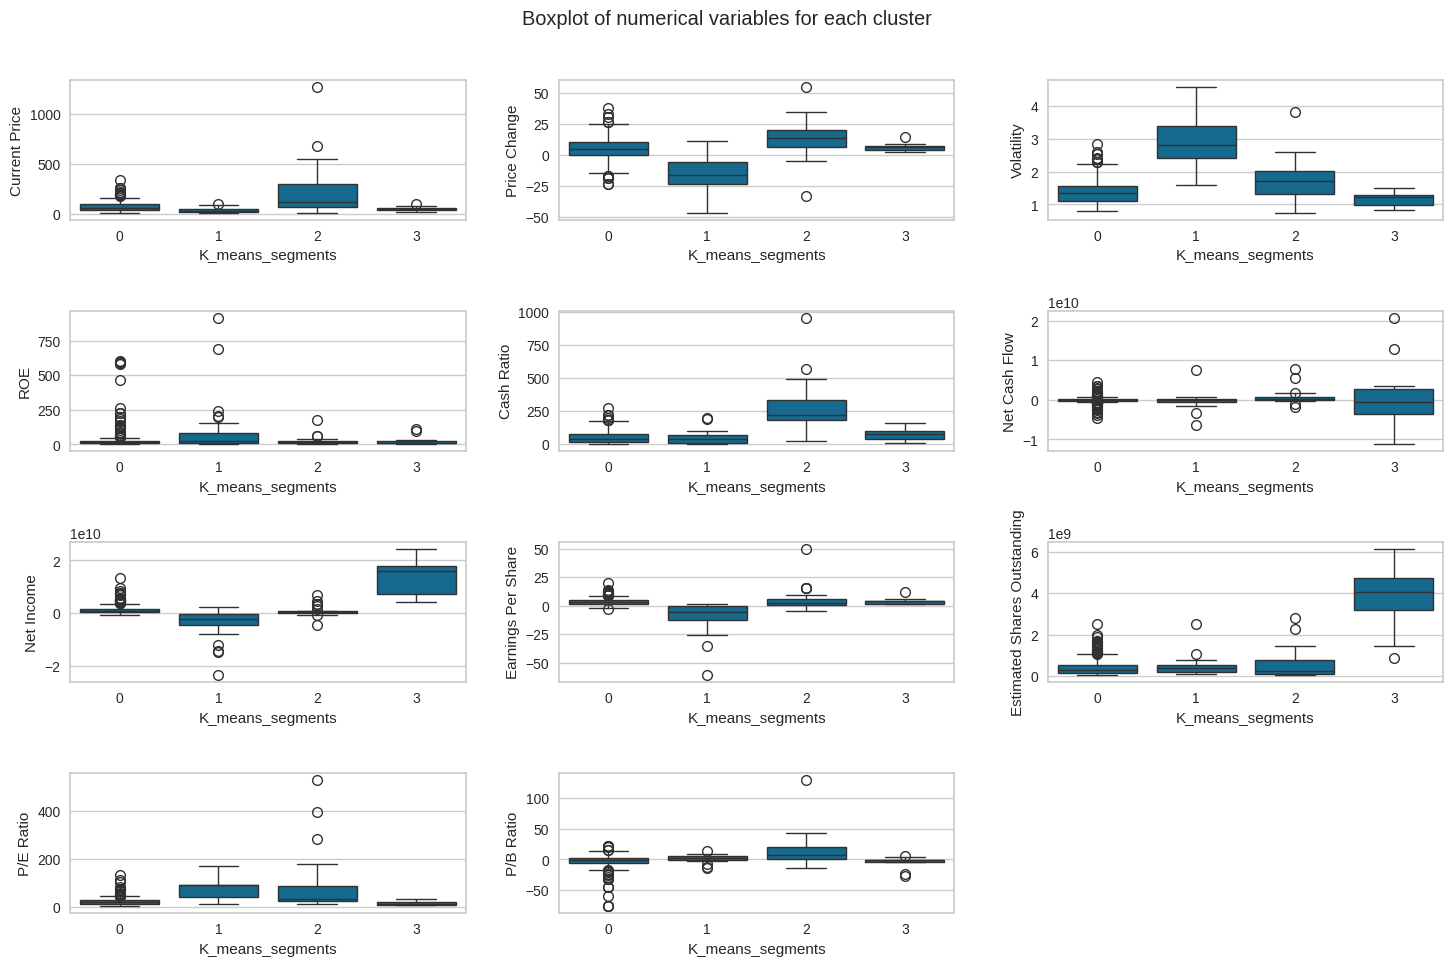

In [338]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - Current Price mean is 72.47
    - Price Change mean is 5.09 in this cluster.
    - Volatility mean is 1.39
    - ROE is 34.7
    - Cash Ratio is 52.94
    - Net Cash Flow is -1.80e+07 (negative value of net cash flow)
    - Net Income is 1.47+09
    - Earnings Per Share 3.63
    - Estimated Shares Outstanding 4.30+08
    - P/E Ratio 23.81
    - P/B Ratio -3.36
    - Total Count is the highest of all clusters at 276

  Insights:
    - Total Count is highest in this cluster at 276
    - The Current Price and Price Change, and Net Income are moderate, close to the average of the data set
    - The Net Cash Flow is very low, in the negative range and significantly lower than average. When looking at the boxplot for this variable, we can see many outliers which may play a role in this value.
    

- **Cluster 1**:
    - Current Price mean is 35.17 (lowest when compared to all clusters)
    - Price Change mean is -16.4 (lowest when compared to all clusters)
    - Volatility mean is highest when compared to all clusters at 2.92
    - ROE is highest when compared to all clusters at 110.96
    - Cash Ratio is 49.46 (lowest compared to all clusters)
    - Net Cash Flow is -1.92e+08 (lowest compared to all clusters)
    - Net Income is -4.04+09 (lowest compared to all clusters)
    - Earnings Per Share -9.85 (lowest when compared to all clusters)
    - Estimated Shares Outstanding 4.83+08
    - P/E Ratio is 78.93 (relatively high)
    - P/B Ratio 1.61 (moderate)
    - Total Count is 26
  
  Insights:
   - This cluster contains the lowest Current Price, Price Range, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share
   - This cluster also has the highest Volatility and ROE while having a relatively high P/E Ratio and moderate P/B ratio
    


- **Cluster 2**:
    - Current Prices are high.
    - Current Price mean is 238.07, highest when compared to all clusters
    - Price Change mean is also the highest 13.51 when compared to all clusters
    - Volatility mean is 1.78
    - ROE is 25.6 (lowest when compared to clusters)
    - Cash Ratio is highest when compared to all clusters at 276.28
    - Net Cash Flow is 7.52e+08
    - Net Income is 9.42+08
    - Earnings Per Share 5.89
    - Estimated Shares Outstanding 5.61+08
    - P/E Ratio is highest when compared to all clusters at 90.22
    - P/B Ratio is highest when compared to all clusters at 14.21
    - Total Count is 25

  Insights:
    - Current Prices, Price Change, Cash Ratio in this cluster are highest as well as P/E Ratio and P/B Ratio
    - ROE is lowest in this cluster

    


- **Cluster 3**:
    - Current Prices are low-moderate
    - Current Price mean is 48.10
    - Price Change mean is 6.05
    - Volatility mean is 1.16 (lowest when compared to all clusters)
    - ROE is 27.54
    - Cash Ratio is 77.23
    - Net Cash Flow is highest of all clusters at 7.73e+08
    - Net Income is highest when compared to all clusters at 1.41e+10
    - Earnings Per Share 3.96
    - Estimated Shares Outstanding is highest of all clusters at 3.92+09
    - P/E Ratio is 16.1 (lowest compared to all clusters)
    - P/B Ratio is -4.25 (lowest compared to all clusters)
    - Total Count is 13
    
  Insights:
    - Net Cash Flow, Net Income, Esimated Shares Outstanding are highest in this cluster
    - Volatility, P/E Ratio, and P/B Ratio is lowest in this cluster
    - Smallest count in this cluster

    

## Hierarchical Clustering

### Check Cophenetic Correlation for each Linkage Method

In [339]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [340]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [341]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [342]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Plot Dendrograms for each Linkage Method

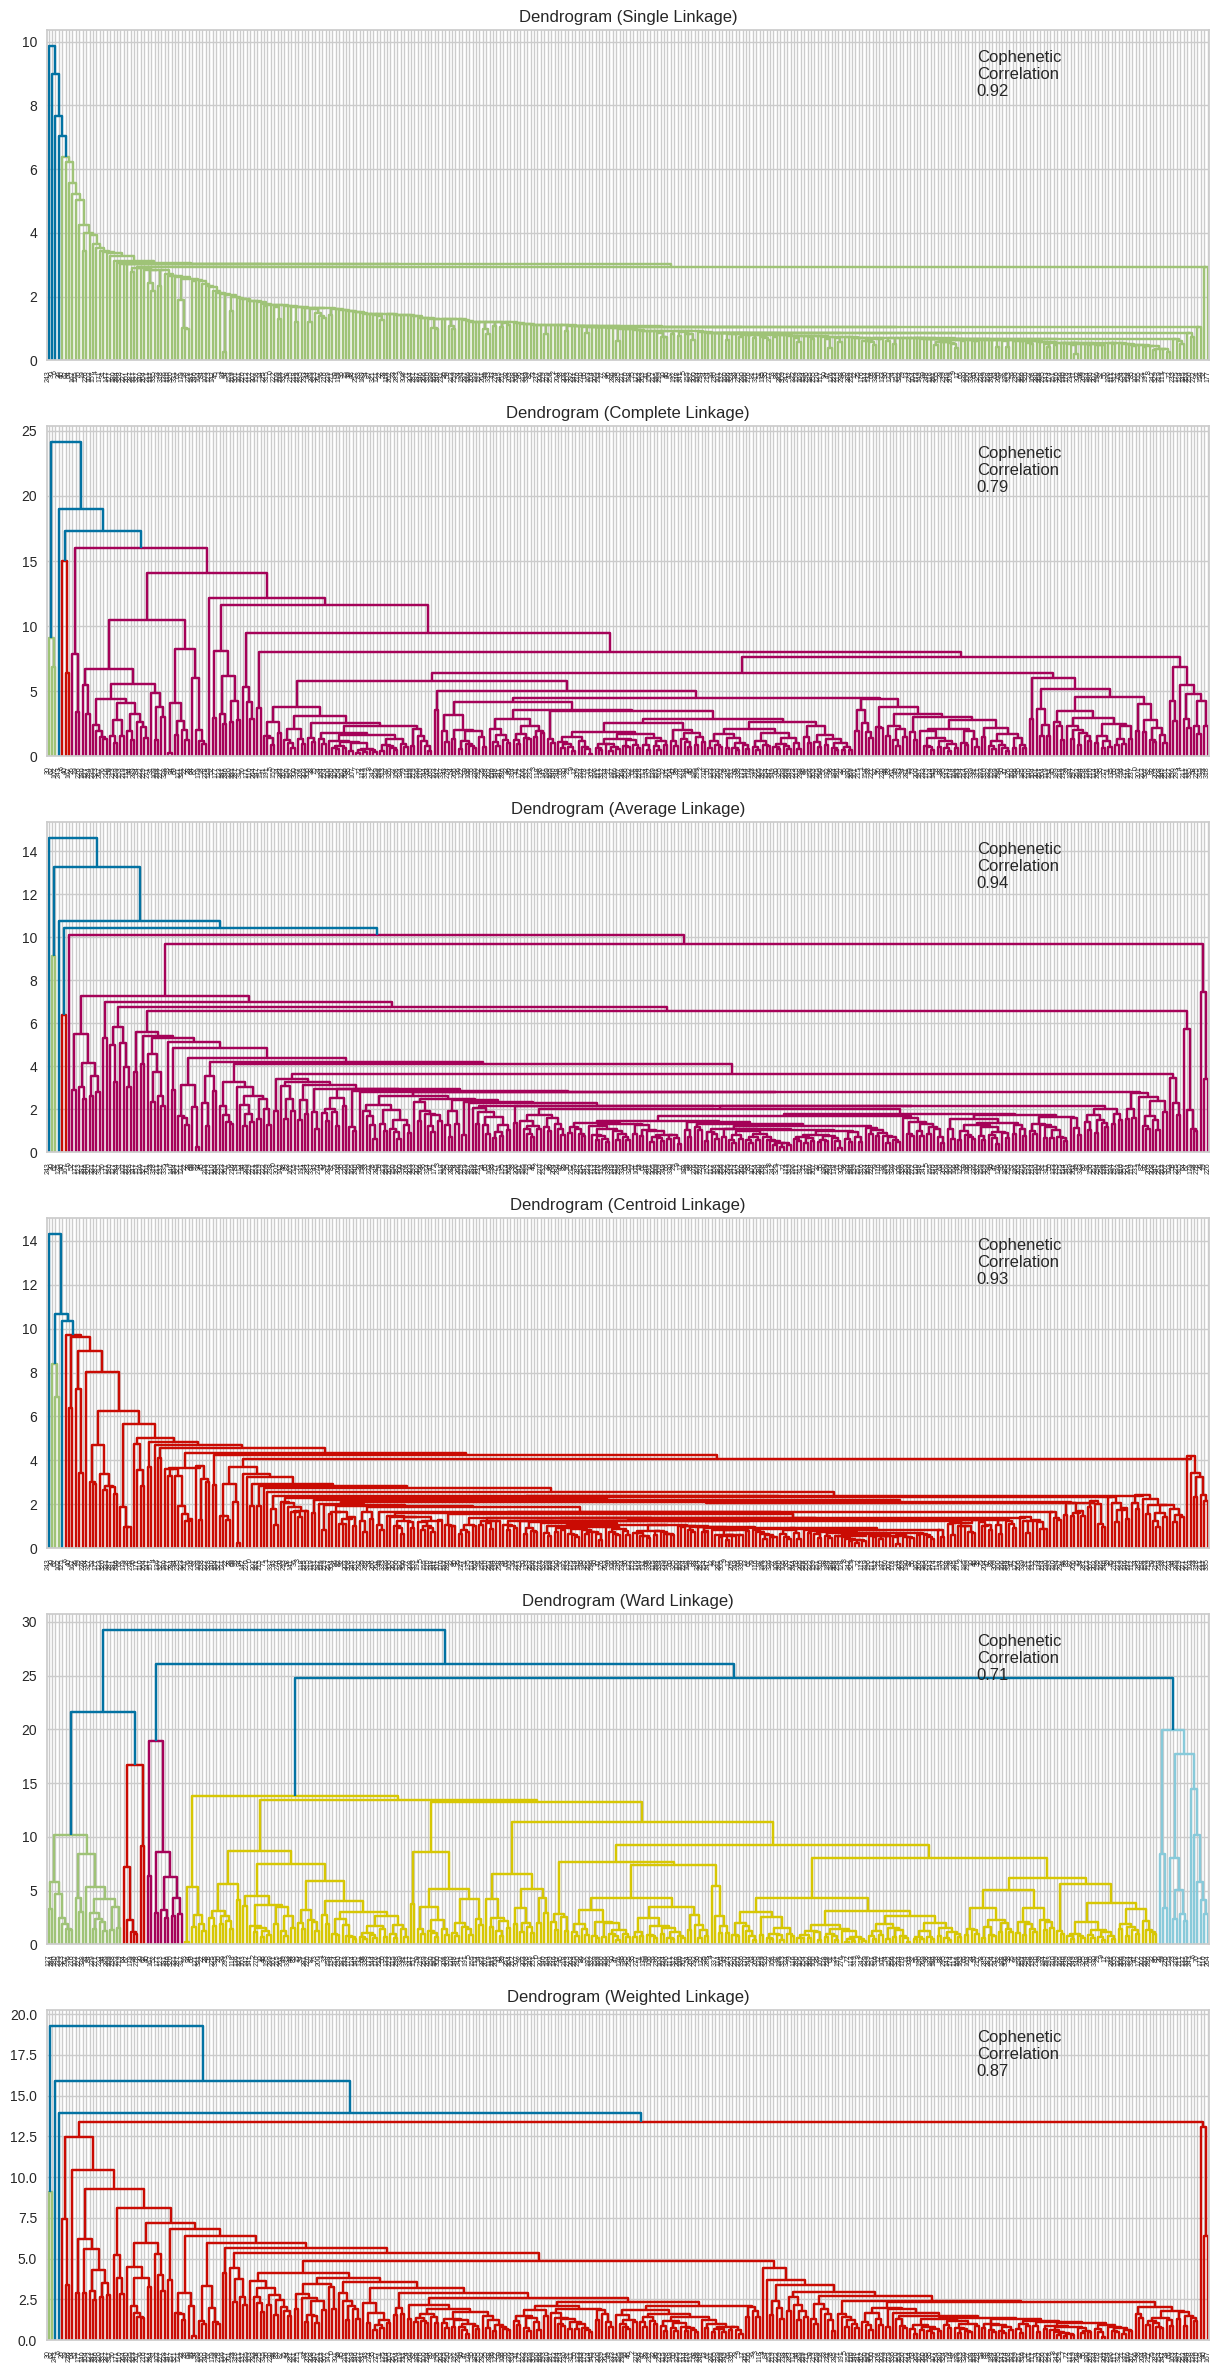

In [343]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average followed by centroid linkage methods.
- We will move ahead with Average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Apply Hierarchical Clustering with Different Linkage Methods

In [344]:
HCmodel = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [345]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Figure out Appropriate Number of Clusters

In [346]:
# Select only the numeric columns for calculating the mean
numeric_cols_df = df.select_dtypes(include=np.number).columns.tolist()
cluster_profile = df.groupby("HC_Clusters")[numeric_cols_df].mean()

In [347]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current Price"].count().values
)

Cluster Profiling

In [348]:
# let's see the names of the sectors in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following sectors are present:
['Energy']

In cluster 3, the following sectors are present:
['Information Technology']

In cluster 1, the following sectors are present:
['Consumer Discretionary']



**We see that there are 3 clusters of one sector, and all the other sectors are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [349]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [350]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

Cluster Profiling

In [351]:
# Select only the numeric columns for calculating the mean
numeric_cols_df = df.select_dtypes(include=np.number).columns.tolist()
cluster_profile = df.groupby("HC_Clusters")[numeric_cols_df].mean()

In [352]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current Price"].count().values
)

In [353]:
# let's see the names of the sectors in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS Sector"].nunique(),
        "sectors in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 sectors in cluster 3 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 8 sectors in cluster 0 are:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Financials' 'Real Estate' 'Telecommunications Services'
 'Consumer Staples' 'Materials']
---------------------------------------------------------------------------------------------------- 

The 5 sectors in cluster 1 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']
---------------------------------------------------------------------------------------------------- 

The 3 sectors in cluster 4 are:
['Energy' 'Materials' 'Information Technology']
------------------------------------------------------------------------------------

**Now the clusters seem to have more variability.**

### Cluster Profiling

In [354]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

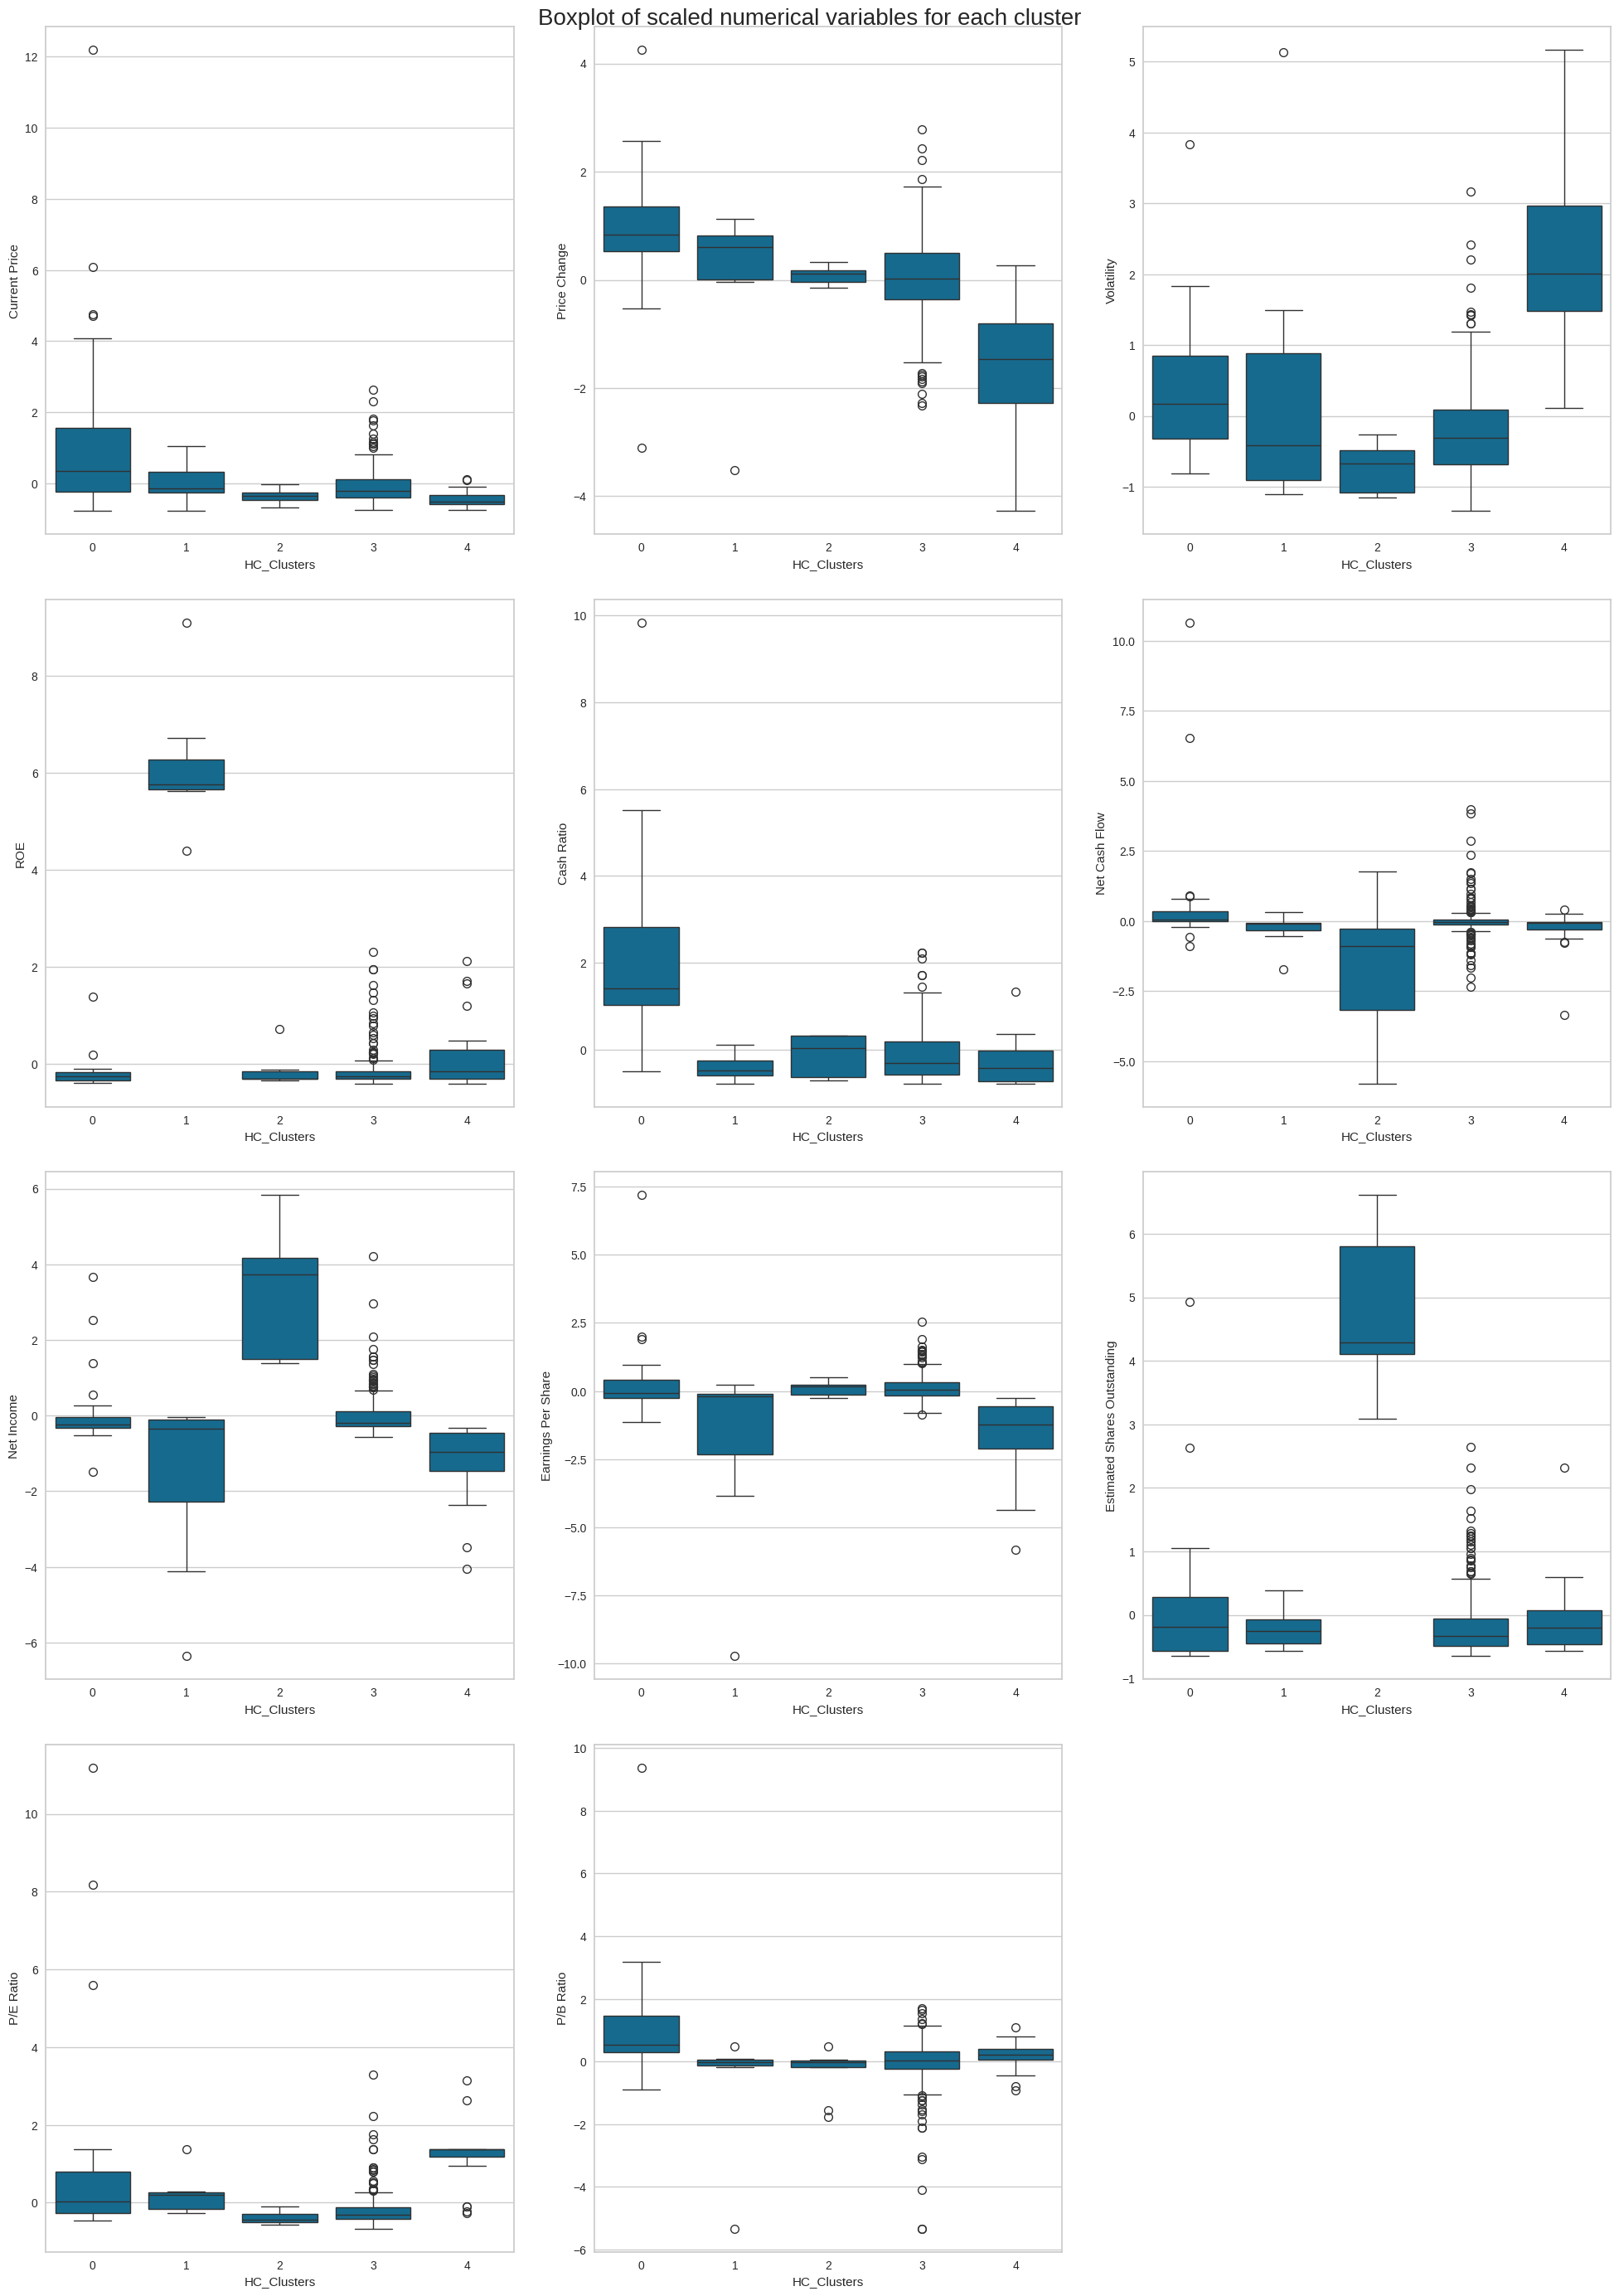

In [355]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

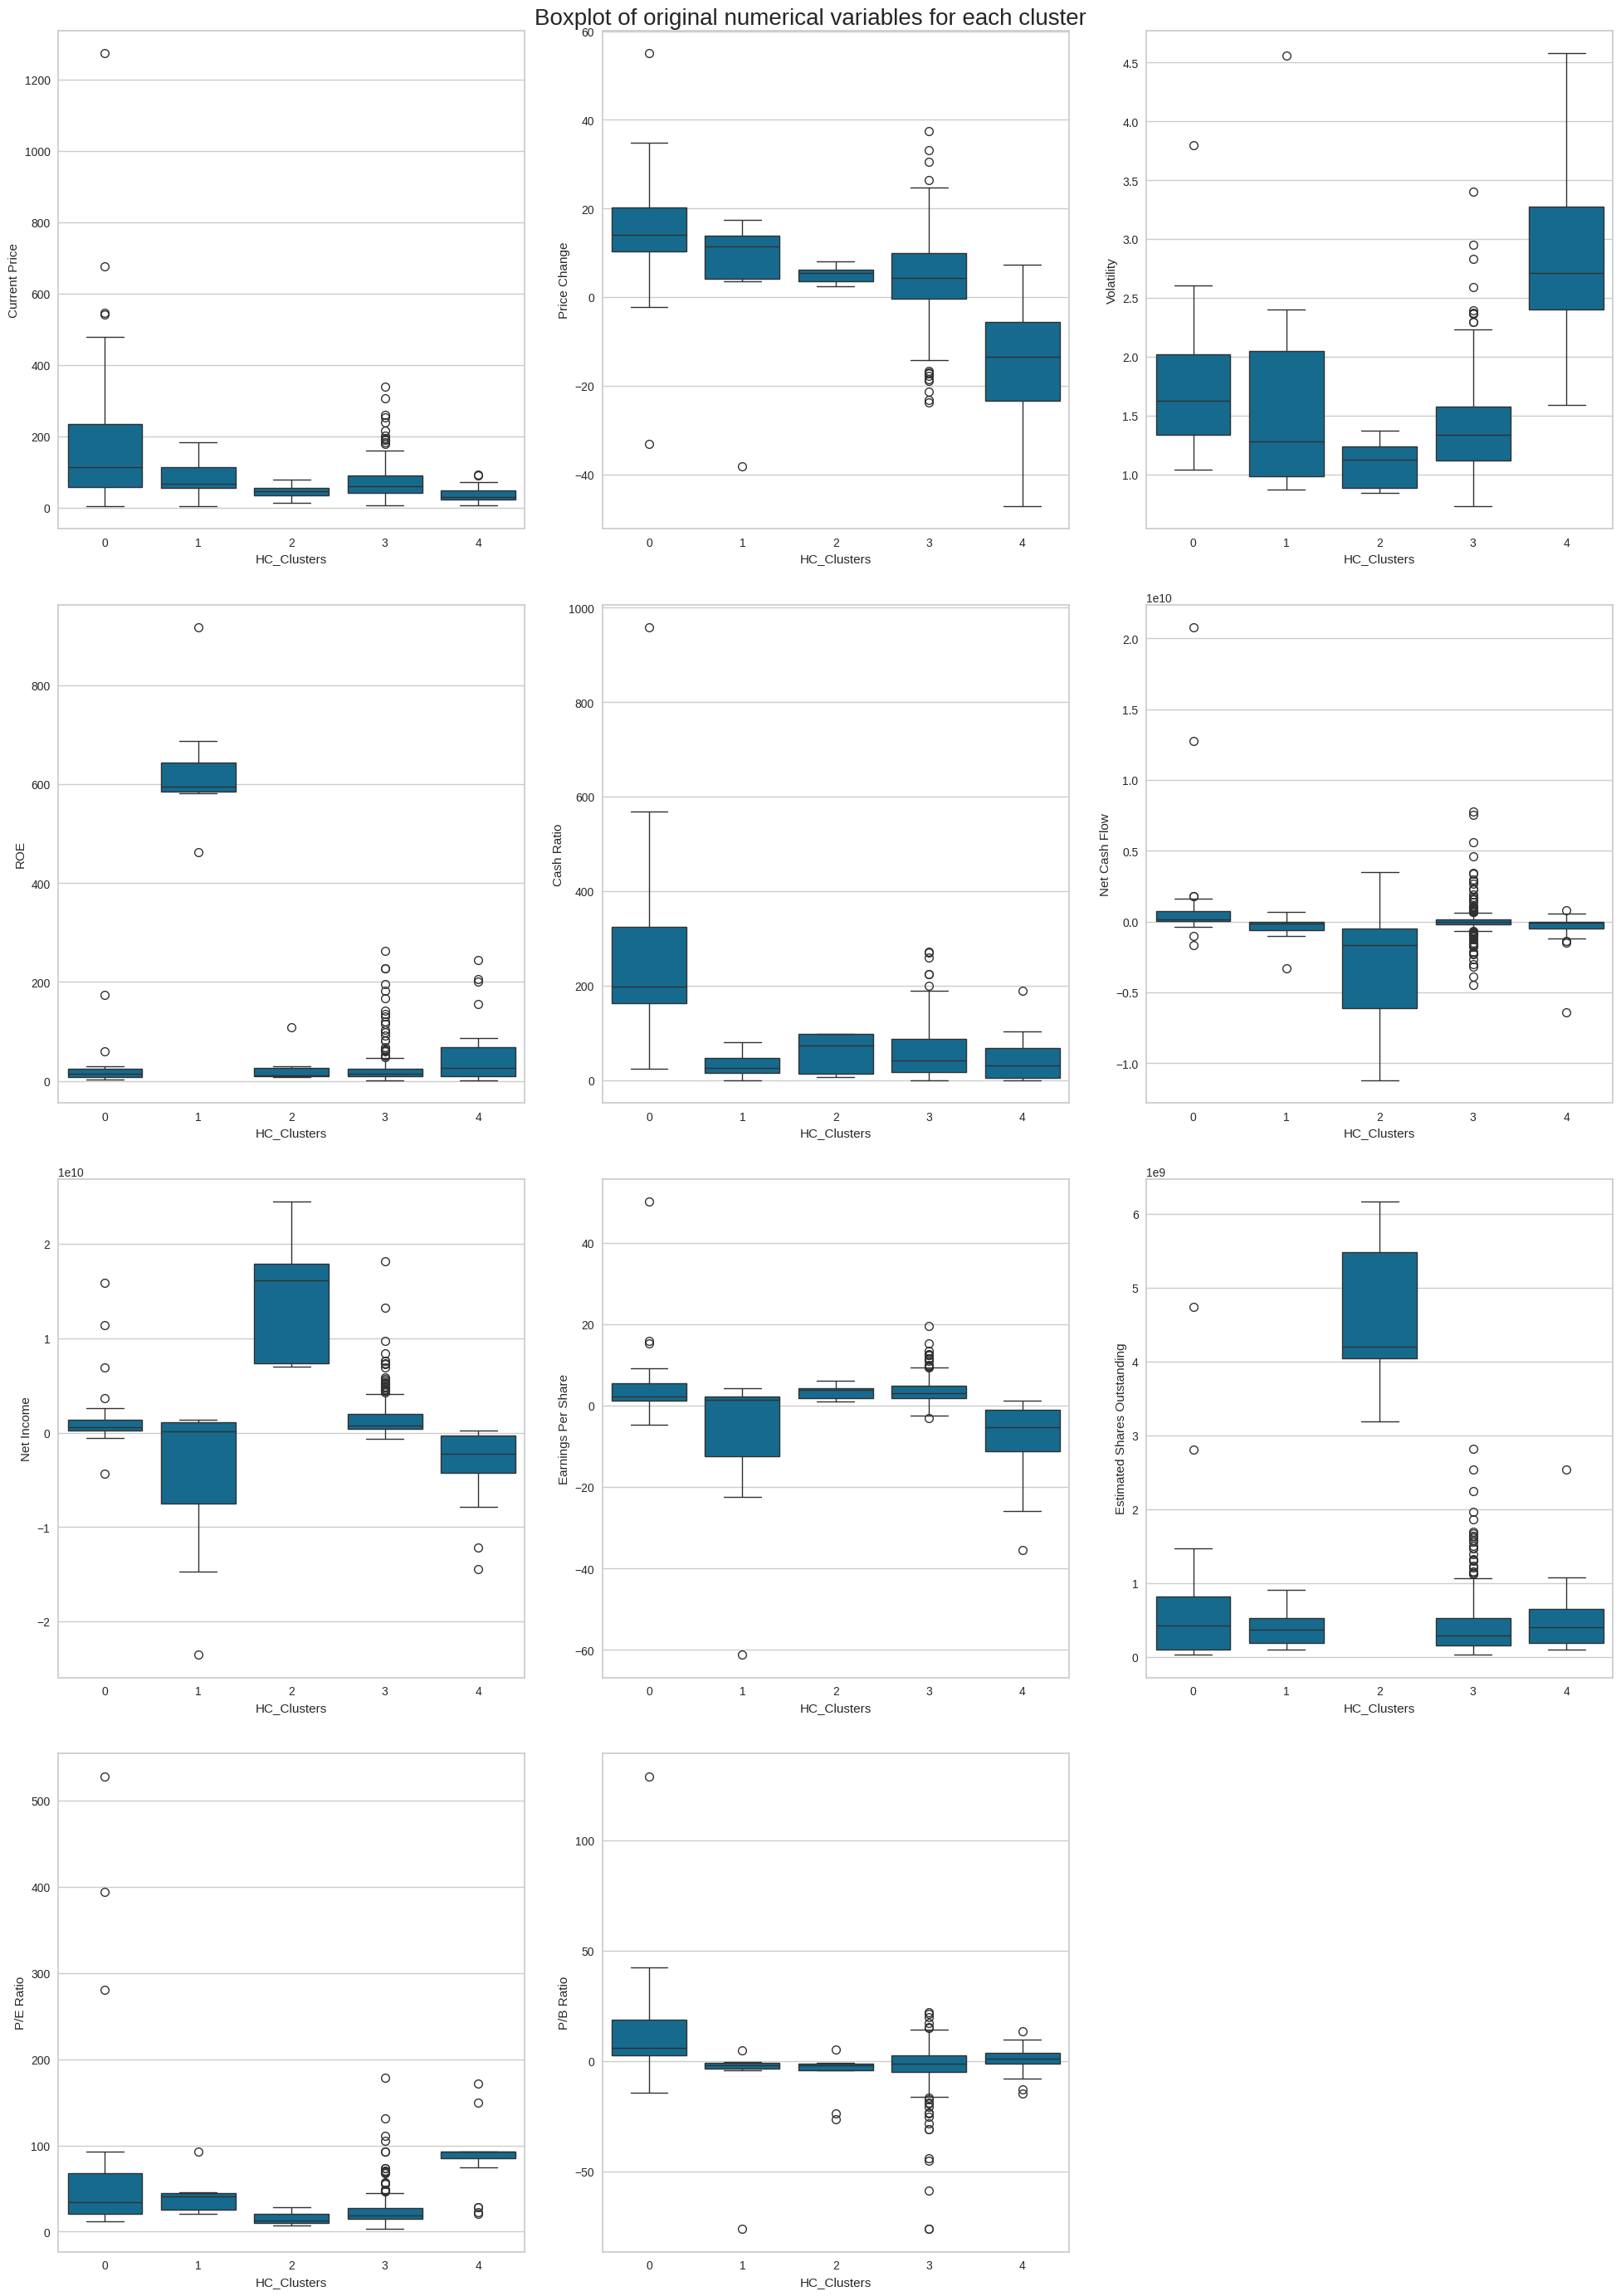

In [356]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - Current Price, Price Change, Cash Ratio, Net Cash Flow, Earnings Per Share and P/B Ratio are the highest in this cluster
    - Total Count is at 27
    

- **Cluster 1**:
    - Current Price mean is moderate, near average
    - Price Change mean relatively low
    - ROE is highest when compared to all clusters at 633.57
    - Cash Ratio is 33.57 (lowest compared to all clusters)
    - Net Cash Flow is low; In addition, Net Income, Earnings Per Share, and P/B Ratio are lowest in this cluster
    - Total Count is 7


- **Cluster 2**:
    - Net Income and Estimated Shares Outstanding are the highest in this cluster
    - Cash Ratio is relatively high
    - P/B Ratio is generally low and in the negative range
    - Total Count is 9  


- **Cluster 3**:
    - Current Prices are moderate, near average
    - Most variables show a moderate average value for this cluster
    - Total Count is highest at 275
  

- **Cluster 4**:
    - Current Prices are relatively low
    - Price Change mean is -16.07 (lowest when compared to all clusters)
    - Volatility mean and P/E Ratio are the highest in this cluster
    - ROE is higher than average
    - Net Cash Flow, Net Income, and Earnings Per Share are very low, in the negative range
    - Total Count is 22

    

## K-means vs Hierarchical Clustering

Comparing K-Means vs Hierachical Clustering
* You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- Which clustering technique took less time for execution?

During the analysis, the K-Means clustering technique appeared to have a more efficient computational time during execution. With hierarchical clustering, different methods were used to find the optimal metric and linkage which took increased time to accomplish but also allowed for checking different cophenetic correlations and dendrograms for comparison. While more in depth, the code took longer to execute when compared to K-Means Clustering.

- Which clustering technique gave you more distinct clusters, or are they the same?

In this case, based off of the visualizations hierarchical clustering using the "Ward" linkage appears to have the most distinct clusters indicating 5 total while the K-Means clustering indicates 4 clusters. Unfortunately, the Sihouette plot for K-Means clustering showed many data points in the negative range indicating poor clustering for certain records despite using different number of clusters k. This may be due to outliers or lack of Feature Elimination (something that can be further implemented in real-world settings by holding discussions with business administration to better focus on certain aspects as it relates to the company).

- How many observations are there in the similar clusters of both algorithms?

Considering K-Means clustering has 4 clusters (1 less than found with Hierachical clustering) there are similarities in some of the clusters. Cluster 0 of this group had the highest count at 276 where most variables are in the moderate range (however the net cash flow was found to be low).
In Hierachical clustering, Cluster 3 had the largest count at 275 with most variables also with a moderate average value.

In K-Means Cluster 1, we find a count of 26 and a cluster that contains the lowest Current Price, Price Range, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share, while also having the highest volatility. In Hierachical Clustering, Cluster 4 has a count of 22 and a cluster that contains low Current Price, lowest Price Range, low Net Cash Flow, Net Income, and Earnings Per Share, while also having the highest volatility.

In K-Means Cluster 2, we have a count of 25 and a cluster that contains the highest Current Price, Price Change, Cash Ratio, P/E Ratio and P/B Ratio, while ROE is the lowest. In Hierachical Clustering, Cluster 0 has a total count of 27 and contains the highest Current Price, Price Change, Cash Ratio, and P/B Ratio; in addition, this cluster also has the highest Net Cash Flow and Earnings Per Share (which are not in the K-Means Cluster 2)

In K-Means Cluster 3, the cluster has the smallest count in this set at 13 and contains the highest Net Cash Flow, Net Income and Estimated Shares Outstanding, while the volatility, P/E Ratio and P/B Ratio are the lowest in the cluster. In Hierachical Clustering, Cluster 2 also has a small count at 9 and contains the highest Net Income and Estimated Shares Outstanding, while the P/B Ratio is generally low.

This leaves Hierachical Cluster 1, that contains the highest ROE (which is in Cluster 1 of K-Means Clustering) and the lowest Cash Ratio (also contained in Cluster 1 of K-Means Clustering). There is only a count of 7 in this cluster which combined with Hierachical Cluster 4 may have been placed in Cluster 1 of K-Means clustering.

- How many clusters are obtained as the appropriate number of clusters from both algorithms?

Hierarchical clustering using the "Ward" linkage appears to have the most distinct clusters indicating 5 total while the K-Means clustering indicates 4 clusters.
Given the similarities and differences between the 2 techniques, the biggest different was the additional cluster in hierachical, which upon closer analysis showed a very small cluster (count of 7) that contained data points that showed highest ROE and lowest Cash Ratio, both of which were grouped within another cluster when using K-Means. Given that the PCA (shown below as additional information) shows 3 distict clusters and indicates that the others can be categorized as outliers, we will go with the number closest to this which is 4 in this case - found using K-Means Clustering.

## Actionable Insights and Recommendations

Using K-Means clustering technique with 4 clusters we recommend the following:

- While having the smallest count, Cluster 3 of K-Means Clustering shows great opportunity as this cluster contains stocks that have the highest Net Cash Flow, Net Income and Estimated Shares Outstanding, while the volatility, P/E Ratio and P/B Ratio are the lowest in the cluster. These are rare stocks (outliers) that may pay off well.

- Cluster 0 has stocks with moderate averages values. Of note, in this analysis Net Cash Flow was low while Net Income was moderate. Stocks in this cluster show no exceptional growth or opportunity (at least compared to Cluster 3)although it makes up the majority of stocks.

- Stocks in Cluster 1 can be considered a very risky stock as it demonstrates the highest volatility that can indicate significant price swings especially when paired with high PE Ratio, which suggests over value.

- Stocks in Cluster 2 may be over-valued and not the best investment. While cash ratio is high, the low ROE outweighs this benefit.


## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [357]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [358]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

np.float64(0.3788456805822763)

<Axes: xlabel='Component 1', ylabel='Component 2'>

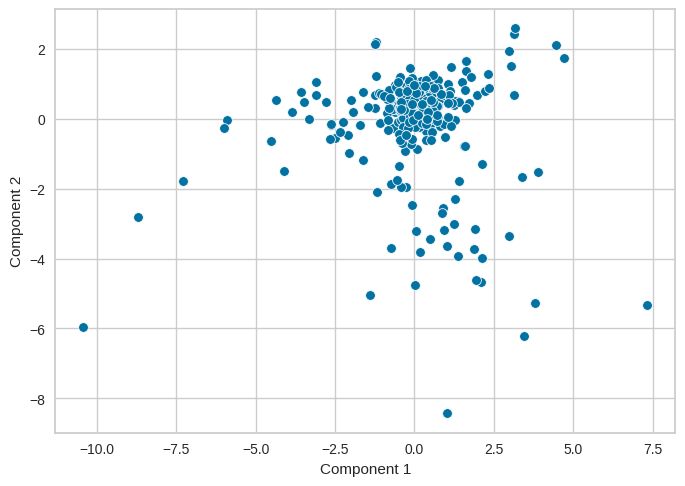

In [359]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

Let's colour the scatterplot by cluster labels.

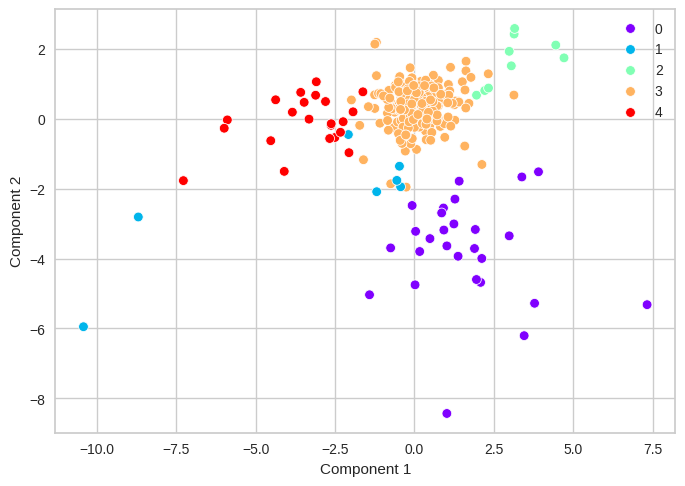

In [360]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0, 3 and 4 are the major clusters in Hierachical clustering where 5 clusters were utilized.
- The rest of the data points seem to be mostly outliers.
- Of note, when comparing K-Means Clustering to Hierarchical clustering, K-Means Cluster 3 is comparable to HC Cluster 2 which shows the most promise when making an investment.
- In addition, HCA Clusters 1 and 4 appear to be grouped together in K-Means Clustering (where they are classified under K-Means Cluster 1) which makes sense when looking at the visualization above.

In [361]:
%%shell
  jupyter nbconvert --to html /content/Final_CMB_USL_Project_LearnerNotebook_FullCode_1.ipynb

[NbConvertApp] Converting notebook /content/Final_CMB_USL_Project_LearnerNotebook_FullCode_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 35 image(s).
[NbConvertApp] Writing 5243927 bytes to /content/Final_CMB_USL_Project_LearnerNotebook_FullCode_1.html
